In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import sklearn as skl
%matplotlib inline

In [141]:
pl_data= pd.read_csv('data.csv')

C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [142]:
pl_data.head()

Name Sex Event Equipment   Age AgeClass BirthYearClass Division  \
0     Abbie Murphy   F   SBD     Wraps  29.0    24-34            NaN     F-OR   
1      Abbie Tuong   F   SBD     Wraps  29.0    24-34            NaN     F-OR   
2   Ainslee Hooper   F     B       Raw  40.0    40-44          40-49     F-OR   
3  Amy Moldenhauer   F   SBD     Wraps  23.0    20-23            NaN     F-OR   
4     Andrea Rowan   F   SBD     Wraps  45.0    45-49          40-49     F-OR   

   BodyweightKg WeightClassKg      ...        McCulloch  Glossbrenner  \
0          59.8            60      ...           324.16        286.42   
1          58.5            60      ...           378.07        334.16   
2          55.4            56      ...            38.56         34.12   
3          60.0            60      ...           345.61        305.37   
4         104.0           110      ...           338.91        274.56   

   IPFPoints  Tested  Country  Federation        Date  MeetCountry  MeetState  \
0     511.15     NaN      NaN     GPC-AUS  2018-10-27    Australia        VIC   
1     595.65     NaN      NaN     GPC-AUS  2018-10-27    Australia        VIC   
2     313.97     NaN      NaN     GPC-AUS  2018-10-27    Australia        VIC   
3     547.04     NaN      NaN     GPC-AUS  2018-10-27    Australia        VIC   
4     550.08     NaN      NaN     GPC-AUS  2018-10-27    Australia        VIC   

        MeetName  
0  Melbourne Cup  
1  Melbourne Cup  
2  Melbourne Cup  
3  Melbourne Cup  
4  Melbourne Cup  

[5 rows x 38 columns]

In [143]:
pl_data.tail()

Name Sex Event Equipment  Age AgeClass  \
1711556       Krzysztof Sauter   M   SBD       Raw  NaN      NaN   
1711557  Krzysztof Gołębiowski   M   SBD       Raw  NaN      NaN   
1711558        Patryk Neukirch   M   SBD       Raw  NaN      NaN   
1711559       Rafał Wróblewski   M   SBD       Raw  NaN      NaN   
1711560       Maciej Juchimiuk   M   SBD       Raw  NaN      NaN   

        BirthYearClass Division  BodyweightKg WeightClassKg  \
1711556            NaN     Open         133.8          120+   
1711557            NaN     Open         120.1          120+   
1711558            NaN     Open         131.0          120+   
1711559            NaN     Open         125.5          120+   
1711560            NaN     Open         121.4          120+   

                      ...                 McCulloch  Glossbrenner  IPFPoints  \
1711556               ...                    374.26        356.85     501.44   
1711557               ...                    349.20        334.62     479.30   
1711558               ...                    336.07        320.89     445.00   
1711559               ...                    335.94        321.36     451.43   
1711560               ...                    335.44        321.43     455.54   

         Tested  Country  Federation        Date  MeetCountry  MeetState  \
1711556     Yes      NaN     PZKFiTS  2019-05-03       Poland        NaN   
1711557     Yes      NaN     PZKFiTS  2019-05-03       Poland        NaN   
1711558     Yes      NaN     PZKFiTS  2019-05-03       Poland        NaN   
1711559     Yes      NaN     PZKFiTS  2019-05-03       Poland        NaN   
1711560     Yes      NaN     PZKFiTS  2019-05-03       Poland        NaN   

                                MeetName  
1711556  Polish University Championships  
1711557  Polish University Championships  
1711558  Polish University Championships  
1711559  Polish University Championships  
1711560  Polish University Championships  

[5 rows x 38 columns]

In [144]:
pl_data.shape

(1711561, 38)

In [145]:
condensed_data= pl_data[ (pl_data['Federation'] == 'IPF') & (pl_data['Event'] == 'SBD')]

In [146]:
condensed_data.head()

Name Sex Event Equipment   Age AgeClass  \
793055          María Guðsteinsdóttir   F   SBD       Raw  48.5    45-49   
793056                    Joy Nnamani   F   SBD       Raw  26.5    24-34   
793057  Ragnheiður Kr. Sigurðardóttir   F   SBD       Raw  37.5    35-39   
793058         Arna Ösp Gunnarsdóttir   F   SBD       Raw  23.5      NaN   
793059      Þórunn Brynja Jónasdóttir   F   SBD       Raw  44.5      NaN   

       BirthYearClass Division  BodyweightKg WeightClassKg  \
793055          40-49     Open          52.0            52   
793056          24-39     Open          57.0            57   
793057          24-39     Open          56.8            57   
793058          24-39     Open          61.7            63   
793059          40-49     Open          70.8            72   

                    ...                McCulloch  Glossbrenner  IPFPoints  \
793055              ...                   413.69        334.27     572.72   
793056              ...                   525.66        464.81     831.85   
793057              ...                   427.62        378.14     671.01   
793058              ...                   403.72        356.59     648.05   
793059              ...                   350.06        295.77     558.00   

        Tested  Country  Federation        Date  MeetCountry  MeetState  \
793055     Yes  Iceland         IPF  2019-01-27      Iceland        NaN   
793056     Yes  England         IPF  2019-01-27      Iceland        NaN   
793057     Yes  Iceland         IPF  2019-01-27      Iceland        NaN   
793058     Yes  Iceland         IPF  2019-01-27      Iceland        NaN   
793059     Yes      NaN         IPF  2019-01-27      Iceland        NaN   

                             MeetName  
793055  Reykjavík International Games  
793056  Reykjavík International Games  
793057  Reykjavík International Games  
793058  Reykjavík International Games  
793059  Reykjavík International Games  

[5 rows x 38 columns]

In [147]:
condensed_data['Division'].unique()

array(['Open', 'Juniors', 'Light', 'Middle', 'Heavy', 'Super',
       'Sub-Juniors', 'SuperHeavy', 'Masters 1', 'Masters 2', 'Masters 3',
       'Masters 4', nan], dtype=object)

In [148]:
#there are a few nan's so let us manually fill in the data frame to add more data points for our program :)
# some fun data scraping
for index,row in condensed_data.iterrows():
    if ~np.isnan(row['Age']):
        if row['Age'] <= 18:
            row['Division'] = 'Sub-Juniors'
        if (row['Age'] >= 19) & (row['Age'] <= 23):
            row['Division'] = 'Juniors'
        if (row['Age'] >= 24) & (row['Age'] <= 39):
            row['Division'] = 'Open'
        if (row['Age'] >= 40) & (row['Age'] <= 49):
            row['Division'] = 'Masters 1'
        if (row['Age'] >= 50) & (row['Age'] <= 59):
            row['Division'] = 'Masters 2'
        if (row['Age'] >= 60) & (row['Age'] <= 69):
            row['Division'] = 'Masters 3'
        if (row['Age'] >= 70) :
            row['Division'] = 'Masters 4'

In [163]:
def totals_hist(sex,equipment,division,weight_class):
    your_df= condensed_data[(condensed_data['Equipment'] == equipment) & (condensed_data['WeightClassKg'] == weight_class) &
                           (condensed_data['Division'] == division) & (condensed_data['Sex'] == sex)]
    totals= your_df['TotalKg'].values
    totals_no_nan = totals[~np.isnan(totals)]
    if totals_no_nan.size == 0:
        return " This IPF data is not within the database for your specified needs :("
    max_total= np.amax(totals_no_nan)
    min_total= np.amin(totals_no_nan)
    mean_total= np.mean(totals_no_nan)
    std_total= np.std(totals_no_nan)
    bins= np.arange(min_total,max_total+1,10)
    plt.hist(totals_no_nan,bins, density= True)
    gaussian_bins= np.linspace(min_total,max_total+100,100)
    plt.plot(gaussian_bins,mlab.normpdf(gaussian_bins,mean_total,std_total))
    title= 'IPF totals for ' + str(weight_class) + ' kg ' + sex + ' in the ' + division + ' division' + ' (' + equipment + ')'
    plt.title(title)
    plt.ylabel('Normalized Frequency of Totals')
    plt.xlabel('Totals (kg)')
    plt.show()
    print('The average total for the ' + str(weight_class) + ' kg ' + 
          sex + ' in the ' + division + ' division' + ' (' + equipment + ') is ' + str(mean_total) + ' kg')
    print('with a standard deviation of ' + str(std_total) + ' kg')

C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  from ipykernel import kernelapp as app


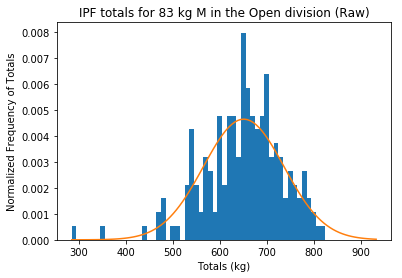

The average total for the 83 kg M in the Open division (Raw) is 651.0026315789473 kg
with a standard deviation of 85.82841661325197 kg


In [164]:
#if you just want to know the spread for your division
totals_hist('M','Raw','Open','83')

In [165]:
#plotting all combinations
weight_classes_men= ['59','66','74','83','93','105','120','120+']
weight_classes_women = ['47','52','57','63','72','84', '84+']
divisions= condensed_data['Division'].unique()
divisions= divisions[:-1]
sexes= condensed_data['Sex'].unique()
equipment_choices= condensed_data['Equipment'].unique()

C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  from ipykernel import kernelapp as app


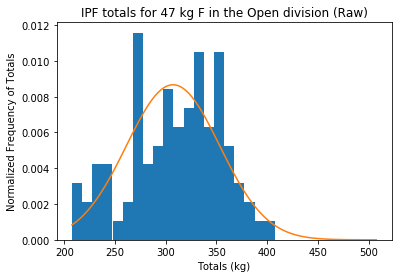

The average total for the 47 kg F in the Open division (Raw) is 307.16315789473686 kg
with a standard deviation of 46.008434129845504 kg


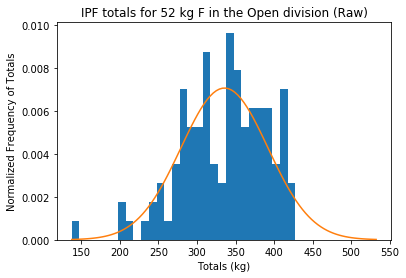

The average total for the 52 kg F in the Open division (Raw) is 335.62931034482756 kg
with a standard deviation of 56.421104539484254 kg


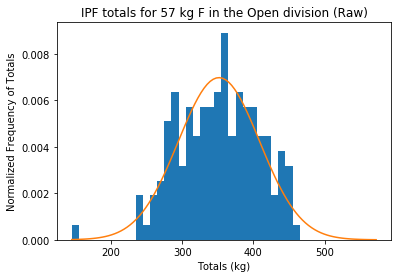

The average total for the 57 kg F in the Open division (Raw) is 351.7169811320755 kg
with a standard deviation of 57.129047571450265 kg


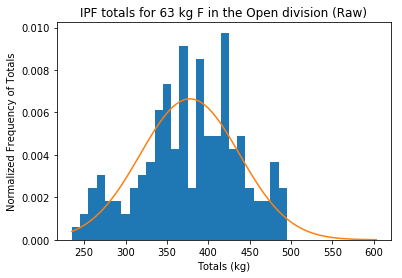

The average total for the 63 kg F in the Open division (Raw) is 377.77272727272725 kg
with a standard deviation of 60.07377924825476 kg


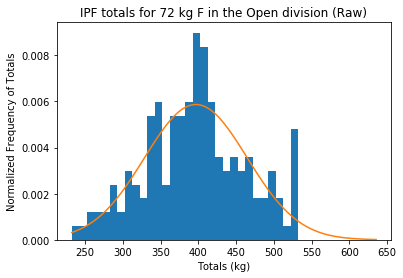

The average total for the 72 kg F in the Open division (Raw) is 396.7544378698225 kg
with a standard deviation of 67.9723690456504 kg


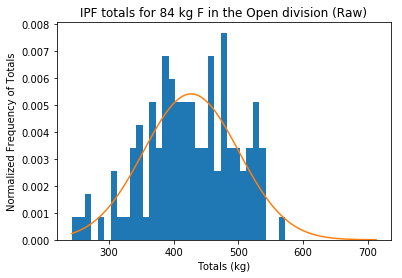

The average total for the 84 kg F in the Open division (Raw) is 426.98319327731093 kg
with a standard deviation of 73.59359023893835 kg


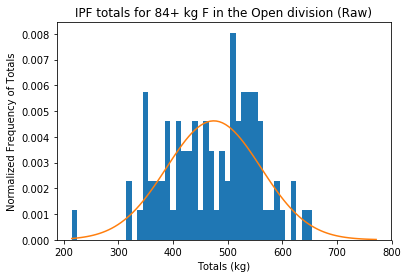

The average total for the 84+ kg F in the Open division (Raw) is 474.5681818181818 kg
with a standard deviation of 86.33063364637793 kg


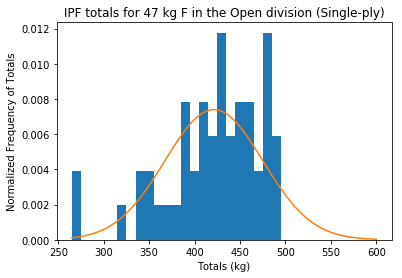

The average total for the 47 kg F in the Open division (Single-ply) is 421.2307692307692 kg
with a standard deviation of 53.94285273274622 kg


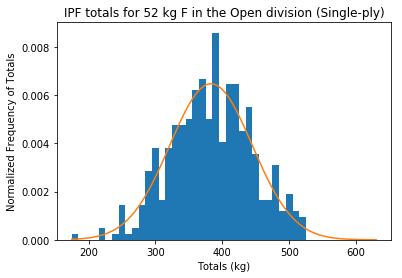

The average total for the 52 kg F in the Open division (Single-ply) is 383.14166666666665 kg
with a standard deviation of 61.614050670925415 kg


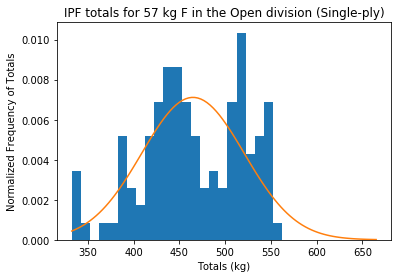

The average total for the 57 kg F in the Open division (Single-ply) is 464.86752136752136 kg
with a standard deviation of 56.07372257967052 kg


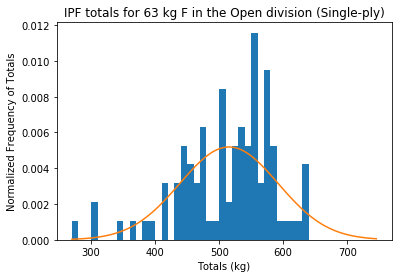

The average total for the 63 kg F in the Open division (Single-ply) is 515.3877551020408 kg
with a standard deviation of 76.85062142447373 kg


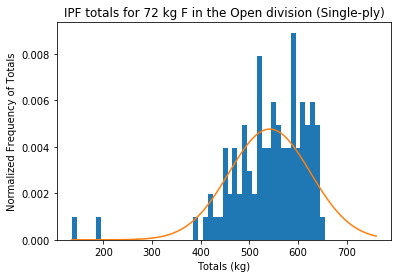

The average total for the 72 kg F in the Open division (Single-ply) is 541.8155339805825 kg
with a standard deviation of 83.72339427535597 kg


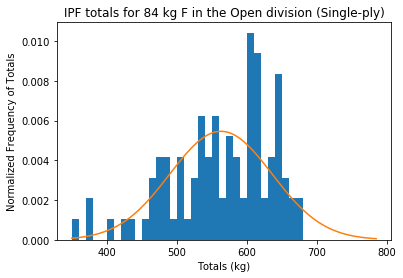

The average total for the 84 kg F in the Open division (Single-ply) is 563.2061855670103 kg
with a standard deviation of 73.08315954555769 kg


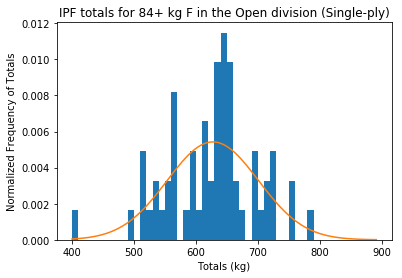

The average total for the 84+ kg F in the Open division (Single-ply) is 627.3467741935484 kg
with a standard deviation of 73.53217359843447 kg


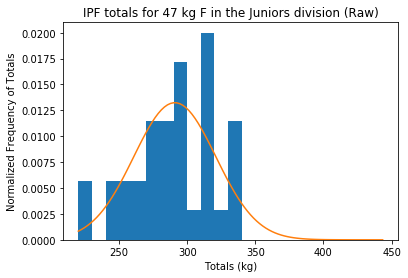

The average total for the 47 kg F in the Juniors division (Raw) is 290.875 kg
with a standard deviation of 30.126671230729166 kg


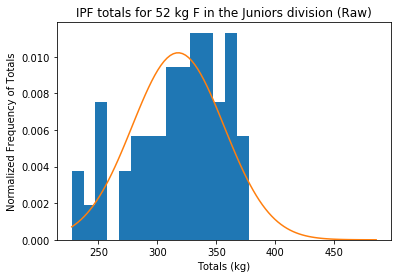

The average total for the 52 kg F in the Juniors division (Raw) is 317.6111111111111 kg
with a standard deviation of 39.01681340646698 kg


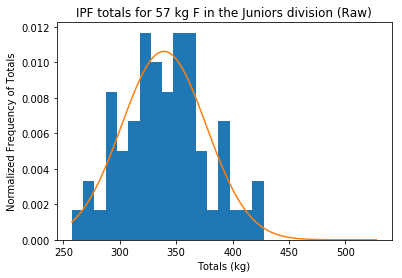

The average total for the 57 kg F in the Juniors division (Raw) is 339.0833333333333 kg
with a standard deviation of 37.56651508398877 kg


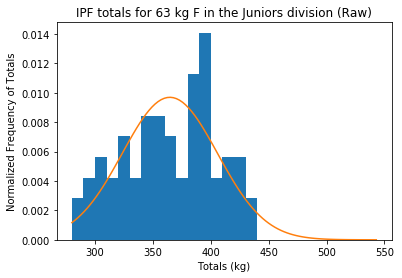

The average total for the 63 kg F in the Juniors division (Raw) is 364.6458333333333 kg
with a standard deviation of 41.16425747842417 kg


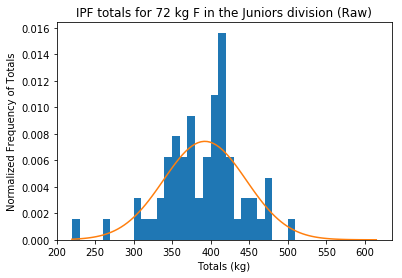

The average total for the 72 kg F in the Juniors division (Raw) is 392.49242424242425 kg
with a standard deviation of 53.70496650642641 kg


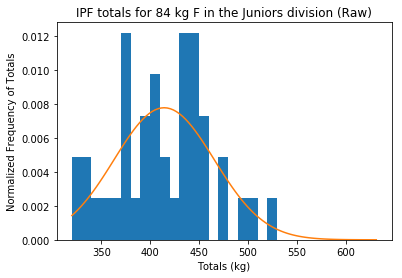

The average total for the 84 kg F in the Juniors division (Raw) is 414.4047619047619 kg
with a standard deviation of 51.30084447639171 kg


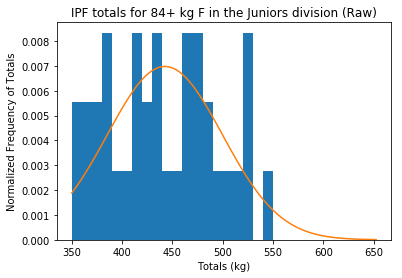

The average total for the 84+ kg F in the Juniors division (Raw) is 442.5135135135135 kg
with a standard deviation of 57.18574365035758 kg


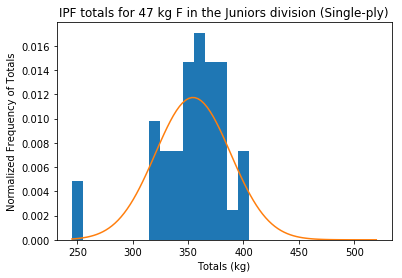

The average total for the 47 kg F in the Juniors division (Single-ply) is 354.4047619047619 kg
with a standard deviation of 33.9984660184835 kg


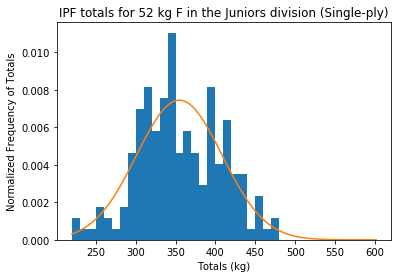

The average total for the 52 kg F in the Juniors division (Single-ply) is 354.7976878612717 kg
with a standard deviation of 53.559804997936844 kg


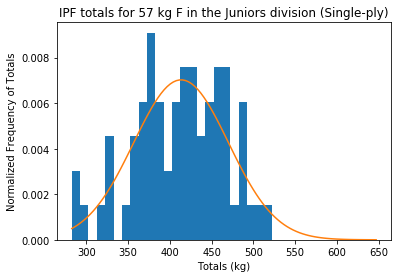

The average total for the 57 kg F in the Juniors division (Single-ply) is 413.3880597014925 kg
with a standard deviation of 56.81370583637462 kg


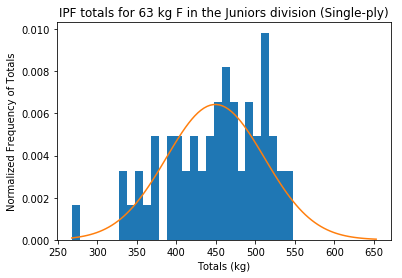

The average total for the 63 kg F in the Juniors division (Single-ply) is 449.3467741935484 kg
with a standard deviation of 62.05893327532783 kg


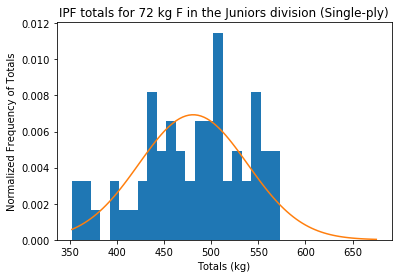

The average total for the 72 kg F in the Juniors division (Single-ply) is 480.96774193548384 kg
with a standard deviation of 57.57595761167281 kg


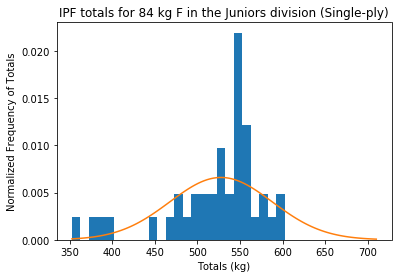

The average total for the 84 kg F in the Juniors division (Single-ply) is 527.6222222222223 kg
with a standard deviation of 60.364555048246984 kg


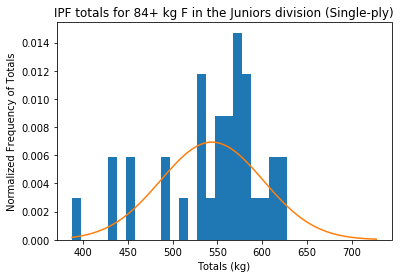

The average total for the 84+ kg F in the Juniors division (Single-ply) is 543.8970588235294 kg
with a standard deviation of 57.50700461321886 kg


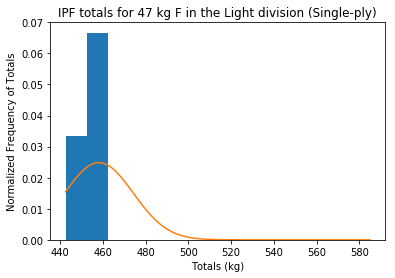

The average total for the 47 kg F in the Light division (Single-ply) is 458.125 kg
with a standard deviation of 16.044372066241795 kg


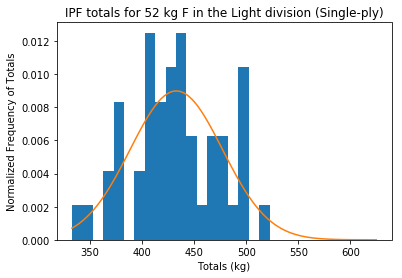

The average total for the 52 kg F in the Light division (Single-ply) is 432.81632653061223 kg
with a standard deviation of 44.39774928538228 kg


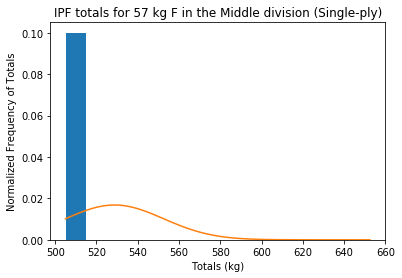

The average total for the 57 kg F in the Middle division (Single-ply) is 528.75 kg
with a standard deviation of 23.75 kg


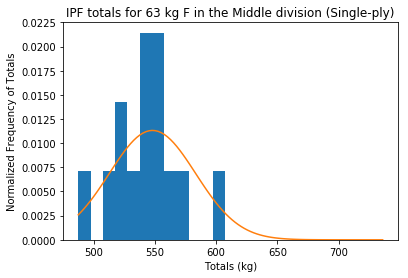

The average total for the 63 kg F in the Middle division (Single-ply) is 548.0666666666667 kg
with a standard deviation of 35.25141447122686 kg


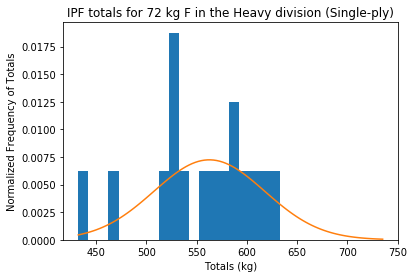

The average total for the 72 kg F in the Heavy division (Single-ply) is 562.75 kg
with a standard deviation of 55.09442651787324 kg


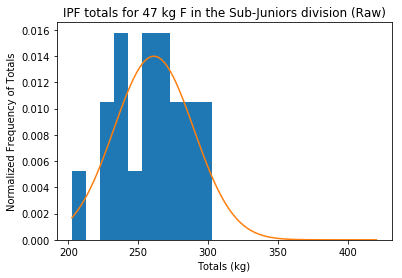

The average total for the 47 kg F in the Sub-Juniors division (Raw) is 261.175 kg
with a standard deviation of 28.491347370736964 kg


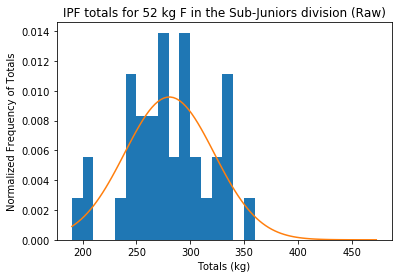

The average total for the 52 kg F in the Sub-Juniors division (Raw) is 280.6081081081081 kg
with a standard deviation of 41.6530286908821 kg


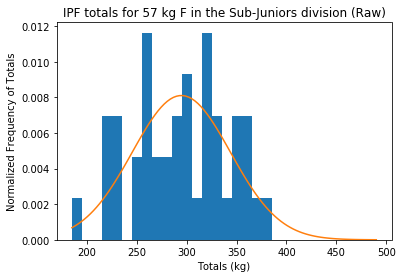

The average total for the 57 kg F in the Sub-Juniors division (Raw) is 294.64772727272725 kg
with a standard deviation of 49.24239437644782 kg


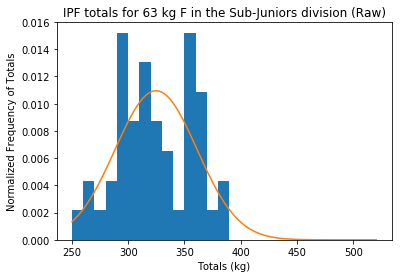

The average total for the 63 kg F in the Sub-Juniors division (Raw) is 324.78723404255317 kg
with a standard deviation of 36.41249269501297 kg


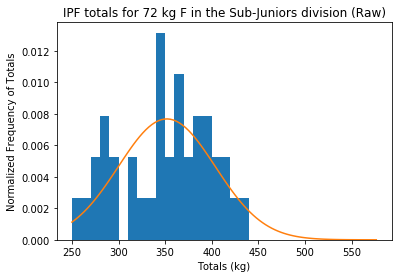

The average total for the 72 kg F in the Sub-Juniors division (Raw) is 351.8333333333333 kg
with a standard deviation of 51.939725092986805 kg


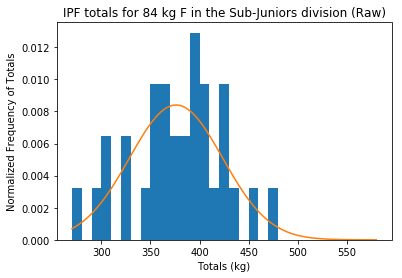

The average total for the 84 kg F in the Sub-Juniors division (Raw) is 376.06451612903226 kg
with a standard deviation of 47.49121173972932 kg


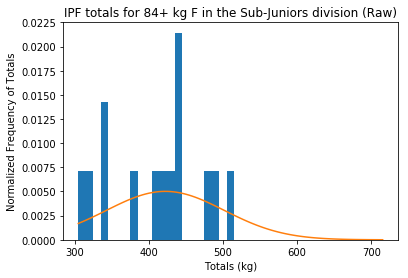

The average total for the 84+ kg F in the Sub-Juniors division (Raw) is 422.3666666666667 kg
with a standard deviation of 79.60265210545576 kg


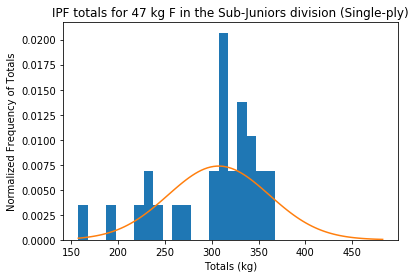

The average total for the 47 kg F in the Sub-Juniors division (Single-ply) is 307.421875 kg
with a standard deviation of 54.15358791423127 kg


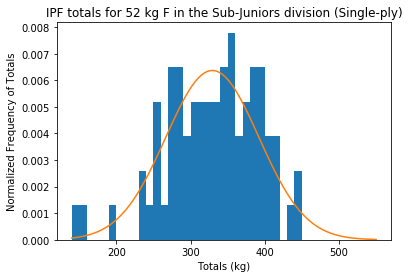

The average total for the 52 kg F in the Sub-Juniors division (Single-ply) is 329.3246753246753 kg
with a standard deviation of 62.60641674063753 kg


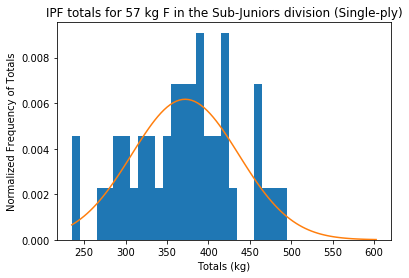

The average total for the 57 kg F in the Sub-Juniors division (Single-ply) is 371.9222222222222 kg
with a standard deviation of 64.66906830210041 kg


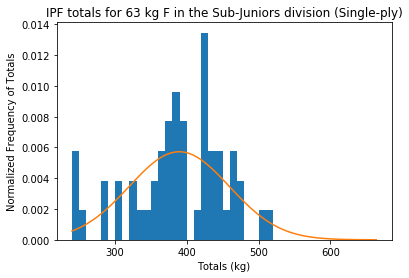

The average total for the 63 kg F in the Sub-Juniors division (Single-ply) is 389.52830188679246 kg
with a standard deviation of 69.68259677525535 kg


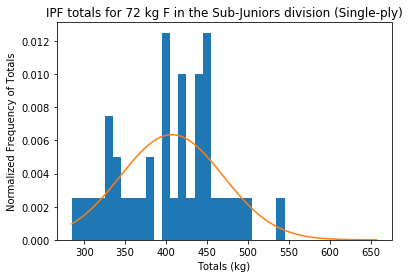

The average total for the 72 kg F in the Sub-Juniors division (Single-ply) is 407.1219512195122 kg
with a standard deviation of 62.87218746924869 kg


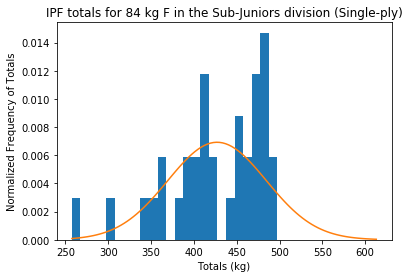

The average total for the 84 kg F in the Sub-Juniors division (Single-ply) is 427.01428571428573 kg
with a standard deviation of 57.59358666110139 kg


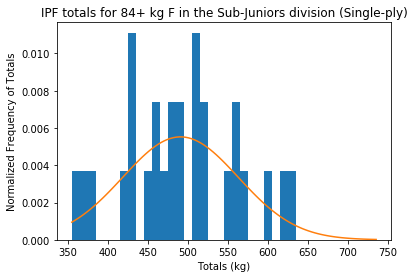

The average total for the 84+ kg F in the Sub-Juniors division (Single-ply) is 490.72222222222223 kg
with a standard deviation of 72.2351270521961 kg


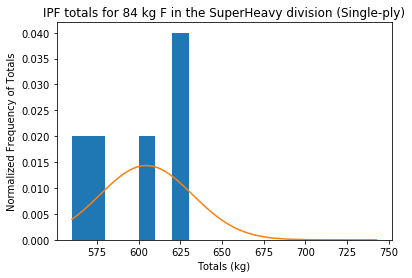

The average total for the 84 kg F in the SuperHeavy division (Single-ply) is 604.5833333333334 kg
with a standard deviation of 27.81698621745753 kg


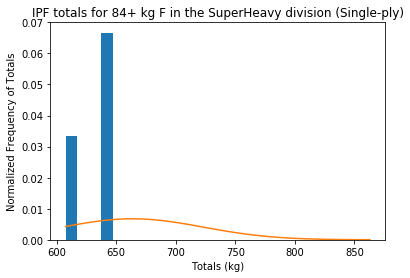

The average total for the 84+ kg F in the SuperHeavy division (Single-ply) is 663.875 kg
with a standard deviation of 59.01310765414748 kg


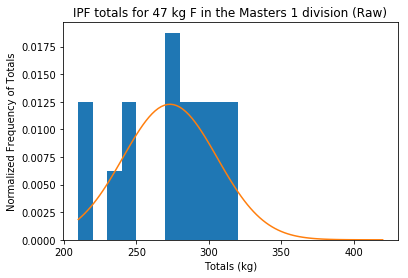

The average total for the 47 kg F in the Masters 1 division (Raw) is 273.28125 kg
with a standard deviation of 32.5086376742782 kg


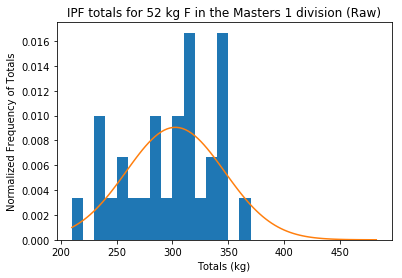

The average total for the 52 kg F in the Masters 1 division (Raw) is 302.59375 kg
with a standard deviation of 44.06891575631853 kg


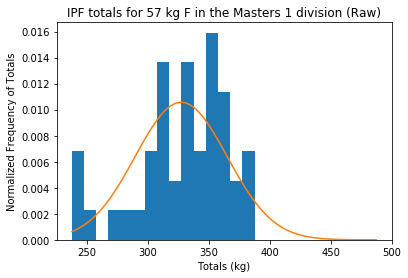

The average total for the 57 kg F in the Masters 1 division (Raw) is 327.21590909090907 kg
with a standard deviation of 37.757509446838505 kg


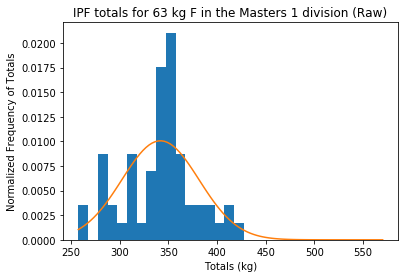

The average total for the 63 kg F in the Masters 1 division (Raw) is 341.8534482758621 kg
with a standard deviation of 39.63073178610883 kg


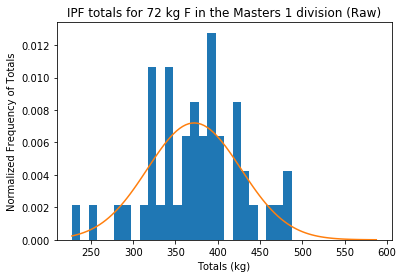

The average total for the 72 kg F in the Masters 1 division (Raw) is 372.1170212765957 kg
with a standard deviation of 55.374567167604546 kg


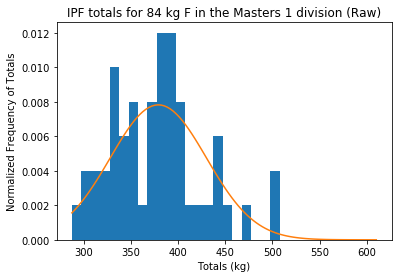

The average total for the 84 kg F in the Masters 1 division (Raw) is 379.0686274509804 kg
with a standard deviation of 51.01412910855525 kg


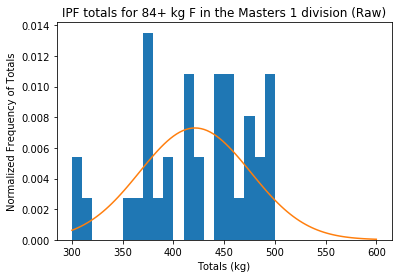

The average total for the 84+ kg F in the Masters 1 division (Raw) is 421.35135135135135 kg
with a standard deviation of 54.6691356257417 kg


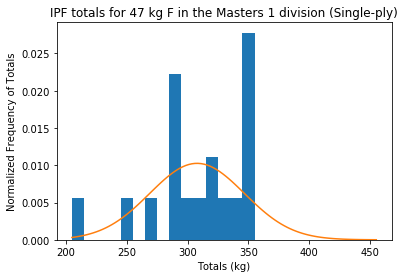

The average total for the 47 kg F in the Masters 1 division (Single-ply) is 307.77777777777777 kg
with a standard deviation of 38.89880825874512 kg


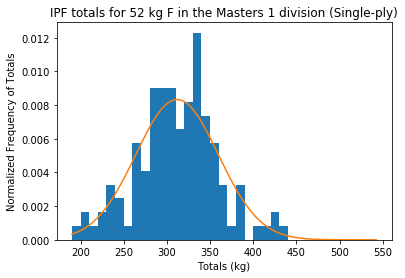

The average total for the 52 kg F in the Masters 1 division (Single-ply) is 311.7967479674797 kg
with a standard deviation of 47.89435517591784 kg


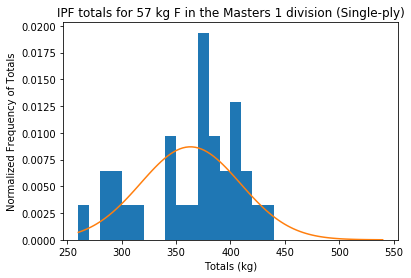

The average total for the 57 kg F in the Masters 1 division (Single-ply) is 363.14516129032256 kg
with a standard deviation of 45.90913071534356 kg


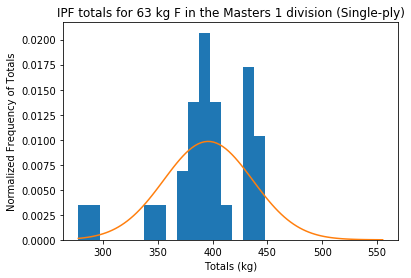

The average total for the 63 kg F in the Masters 1 division (Single-ply) is 395.93333333333334 kg
with a standard deviation of 40.580318163146806 kg


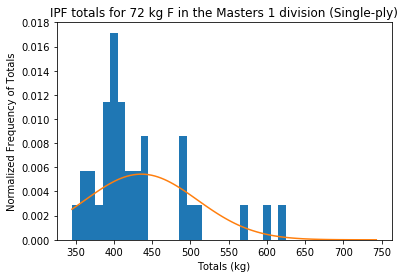

The average total for the 72 kg F in the Masters 1 division (Single-ply) is 435.7361111111111 kg
with a standard deviation of 73.39982649380711 kg


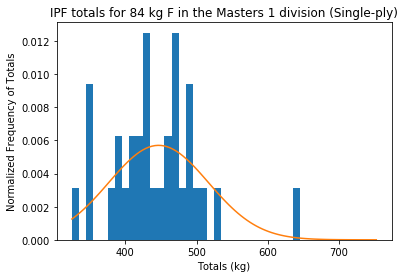

The average total for the 84 kg F in the Masters 1 division (Single-ply) is 446.74242424242425 kg
with a standard deviation of 69.97425080657334 kg


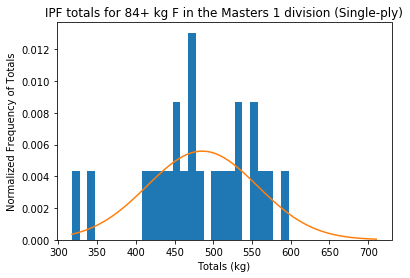

The average total for the 84+ kg F in the Masters 1 division (Single-ply) is 485.75 kg
with a standard deviation of 71.41953514270448 kg


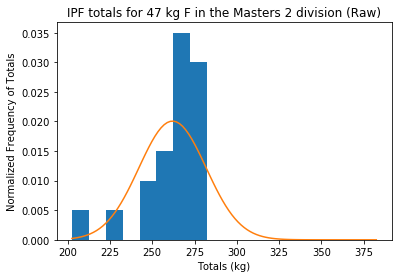

The average total for the 47 kg F in the Masters 2 division (Raw) is 262.0 kg
with a standard deviation of 19.884038825148174 kg


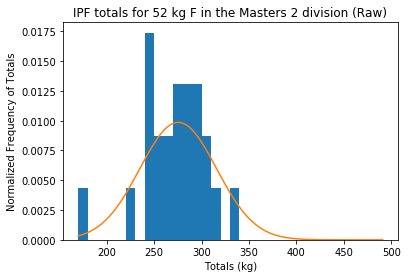

The average total for the 52 kg F in the Masters 2 division (Raw) is 275.375 kg
with a standard deviation of 40.43597047596772 kg


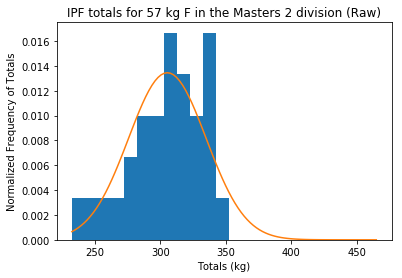

The average total for the 57 kg F in the Masters 2 division (Raw) is 305.38709677419354 kg
with a standard deviation of 29.66852075566533 kg


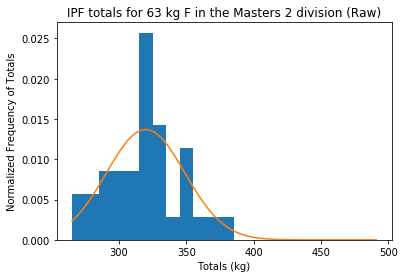

The average total for the 63 kg F in the Masters 2 division (Raw) is 319.77777777777777 kg
with a standard deviation of 29.129606084142026 kg


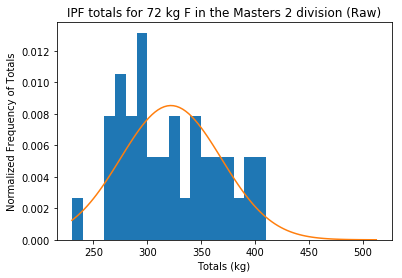

The average total for the 72 kg F in the Masters 2 division (Raw) is 321.85897435897436 kg
with a standard deviation of 46.76632427428467 kg


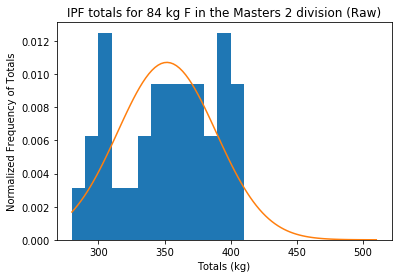

The average total for the 84 kg F in the Masters 2 division (Raw) is 351.734375 kg
with a standard deviation of 37.25335227680021 kg


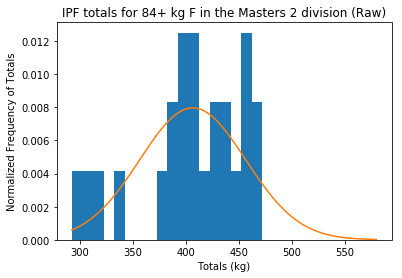

The average total for the 84+ kg F in the Masters 2 division (Raw) is 406.62 kg
with a standard deviation of 50.0877789485619 kg


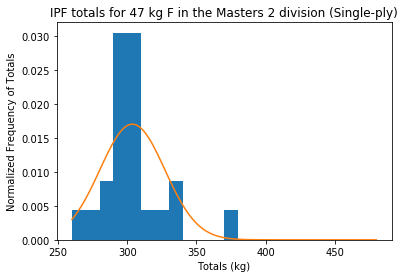

The average total for the 47 kg F in the Masters 2 division (Single-ply) is 303.69565217391306 kg
with a standard deviation of 23.462152283881814 kg


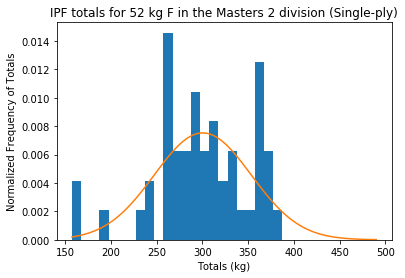

The average total for the 52 kg F in the Masters 2 division (Single-ply) is 300.42857142857144 kg
with a standard deviation of 52.9986522739696 kg


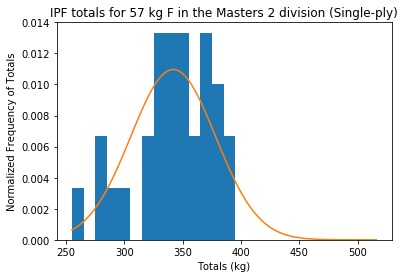

The average total for the 57 kg F in the Masters 2 division (Single-ply) is 341.83870967741933 kg
with a standard deviation of 36.371379012051406 kg


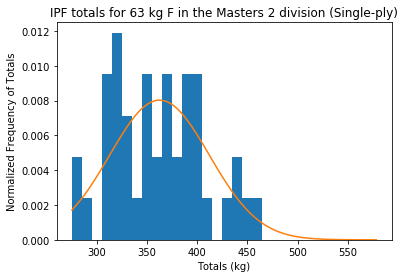

The average total for the 63 kg F in the Masters 2 division (Single-ply) is 362.33720930232556 kg
with a standard deviation of 49.68502194993472 kg


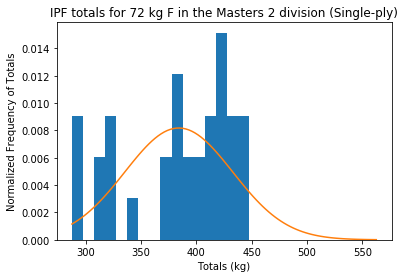

The average total for the 72 kg F in the Masters 2 division (Single-ply) is 384.04411764705884 kg
with a standard deviation of 48.77173235761295 kg


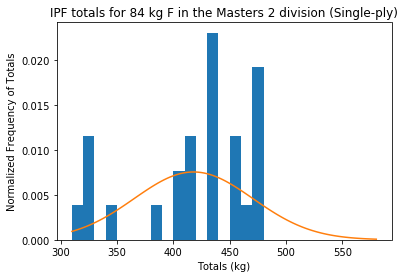

The average total for the 84 kg F in the Masters 2 division (Single-ply) is 417.88461538461536 kg
with a standard deviation of 52.77260866066857 kg


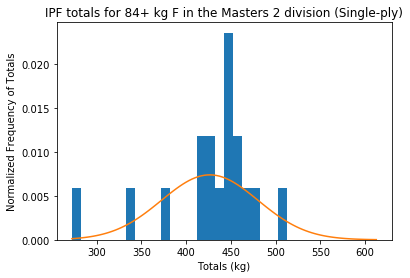

The average total for the 84+ kg F in the Masters 2 division (Single-ply) is 426.47058823529414 kg
with a standard deviation of 54.063271915804485 kg


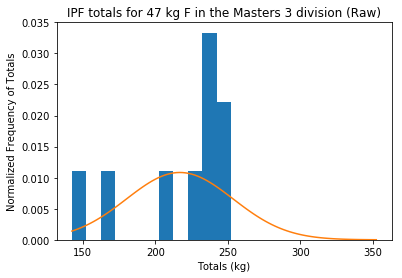

The average total for the 47 kg F in the Masters 3 division (Raw) is 216.94444444444446 kg
with a standard deviation of 36.813678348954035 kg


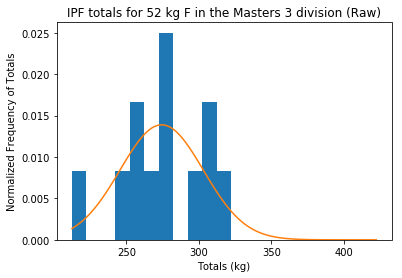

The average total for the 52 kg F in the Masters 3 division (Raw) is 274.4166666666667 kg
with a standard deviation of 28.73719521611128 kg


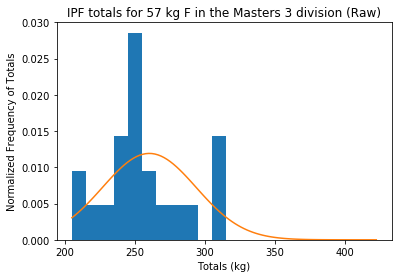

The average total for the 57 kg F in the Masters 3 division (Raw) is 260.30434782608694 kg
with a standard deviation of 33.472486797379666 kg


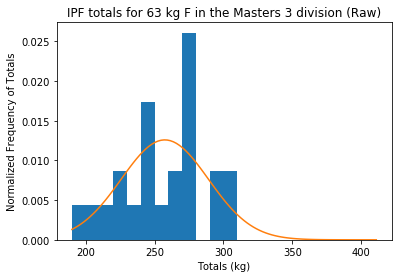

The average total for the 63 kg F in the Masters 3 division (Raw) is 257.4375 kg
with a standard deviation of 31.6965798956817 kg


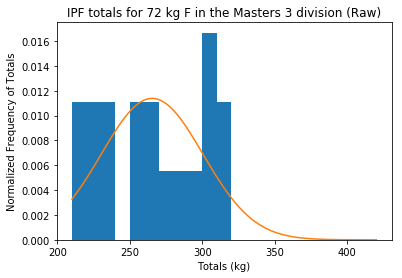

The average total for the 72 kg F in the Masters 3 division (Raw) is 265.3333333333333 kg
with a standard deviation of 35.04441626152604 kg


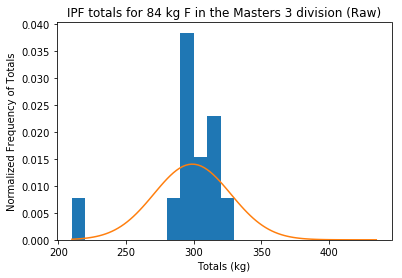

The average total for the 84 kg F in the Masters 3 division (Raw) is 299.0 kg
with a standard deviation of 28.39013913315678 kg


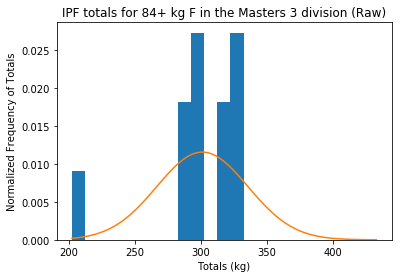

The average total for the 84+ kg F in the Masters 3 division (Raw) is 301.2916666666667 kg
with a standard deviation of 34.53588612668793 kg


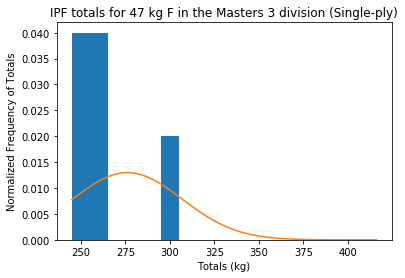

The average total for the 47 kg F in the Masters 3 division (Single-ply) is 276.14285714285717 kg
with a standard deviation of 30.739358536984895 kg


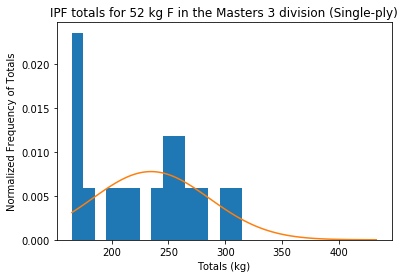

The average total for the 52 kg F in the Masters 3 division (Single-ply) is 234.61111111111111 kg
with a standard deviation of 51.46534852466689 kg


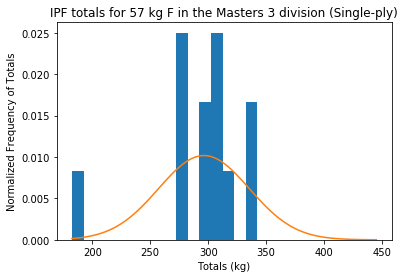

The average total for the 57 kg F in the Masters 3 division (Single-ply) is 296.34615384615387 kg
with a standard deviation of 39.21851241411805 kg


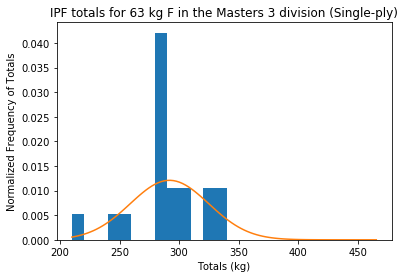

The average total for the 63 kg F in the Masters 3 division (Single-ply) is 291.9 kg
with a standard deviation of 32.98431445399464 kg


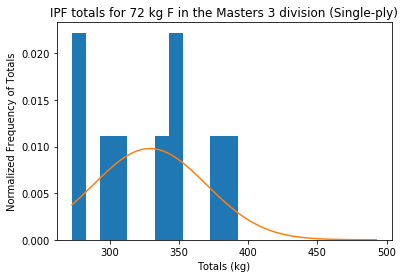

The average total for the 72 kg F in the Masters 3 division (Single-ply) is 328.8888888888889 kg
with a standard deviation of 40.7415824828869 kg


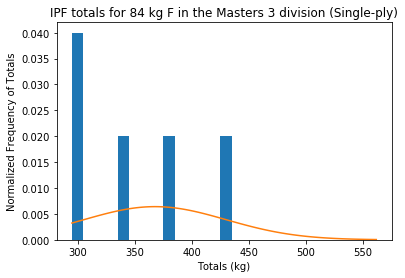

The average total for the 84 kg F in the Masters 3 division (Single-ply) is 367.75 kg
with a standard deviation of 62.288809856452815 kg


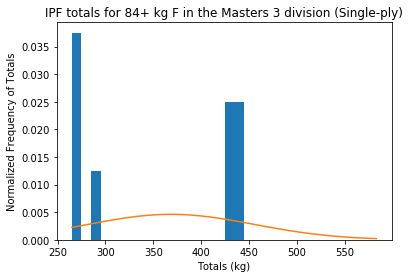

The average total for the 84+ kg F in the Masters 3 division (Single-ply) is 368.6666666666667 kg
with a standard deviation of 86.55634003352961 kg


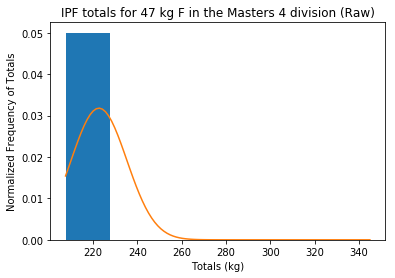

The average total for the 47 kg F in the Masters 4 division (Raw) is 222.6 kg
with a standard deviation of 12.551493934986386 kg


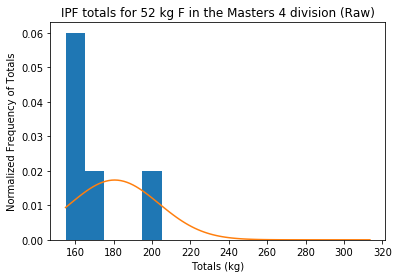

The average total for the 52 kg F in the Masters 4 division (Raw) is 180.57142857142858 kg
with a standard deviation of 23.03790133582449 kg


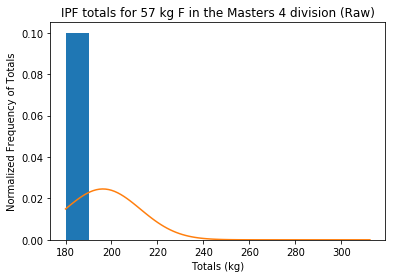

The average total for the 57 kg F in the Masters 4 division (Raw) is 196.25 kg
with a standard deviation of 16.25 kg


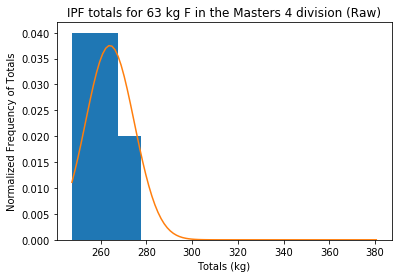

The average total for the 63 kg F in the Masters 4 division (Raw) is 264.0833333333333 kg
with a standard deviation of 10.627859092446085 kg


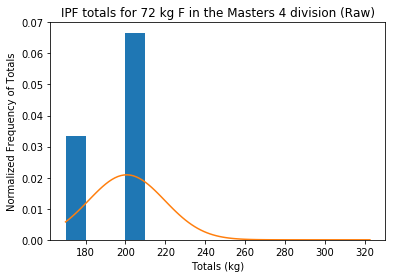

The average total for the 72 kg F in the Masters 4 division (Raw) is 200.625 kg
with a standard deviation of 19.070182877990447 kg


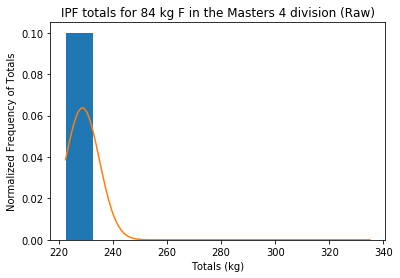

The average total for the 84 kg F in the Masters 4 division (Raw) is 228.75 kg
with a standard deviation of 6.25 kg


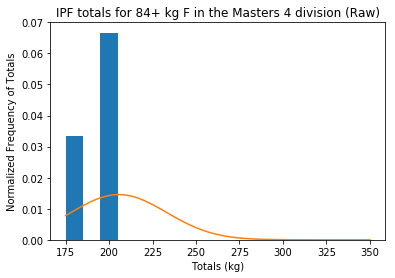

The average total for the 84+ kg F in the Masters 4 division (Raw) is 205.625 kg
with a standard deviation of 27.407514936600872 kg


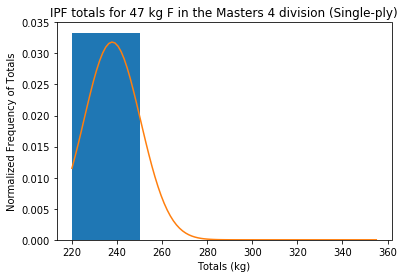

The average total for the 47 kg F in the Masters 4 division (Single-ply) is 237.875 kg
with a standard deviation of 12.531834462679436 kg


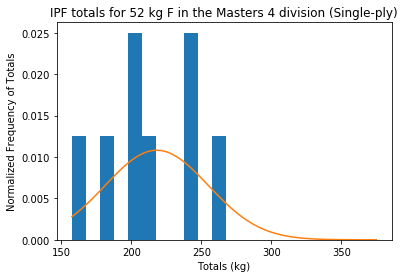

The average total for the 52 kg F in the Masters 4 division (Single-ply) is 218.11111111111111 kg
with a standard deviation of 36.89984776976863 kg


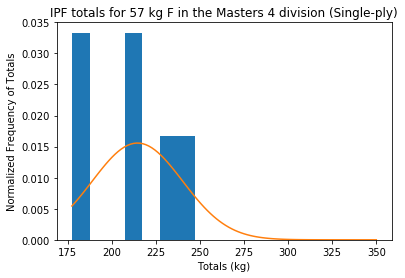

The average total for the 57 kg F in the Masters 4 division (Single-ply) is 214.64285714285714 kg
with a standard deviation of 25.61488725291587 kg


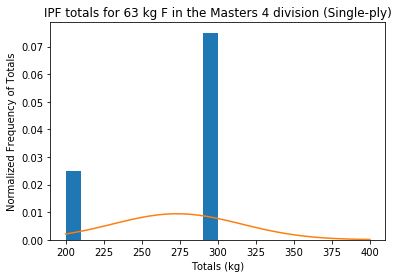

The average total for the 63 kg F in the Masters 4 division (Single-ply) is 273.25 kg
with a standard deviation of 42.32094635047756 kg


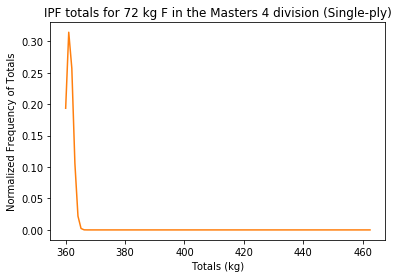

The average total for the 72 kg F in the Masters 4 division (Single-ply) is 361.25 kg
with a standard deviation of 1.25 kg


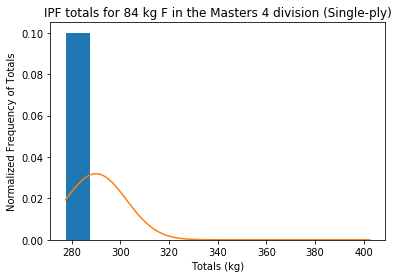

The average total for the 84 kg F in the Masters 4 division (Single-ply) is 290.0 kg
with a standard deviation of 12.5 kg


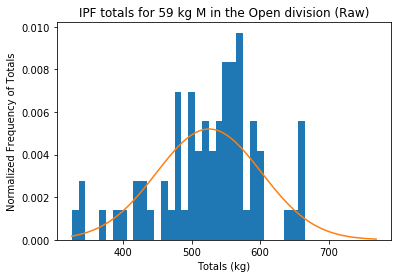

The average total for the 59 kg M in the Open division (Raw) is 525.5 kg
with a standard deviation of 76.69910967317374 kg


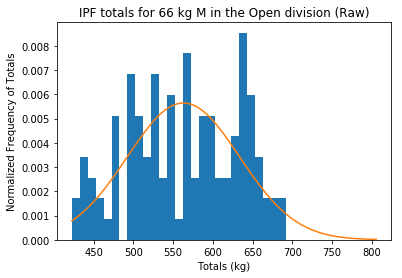

The average total for the 66 kg M in the Open division (Raw) is 563.0084745762712 kg
with a standard deviation of 70.64814891510399 kg


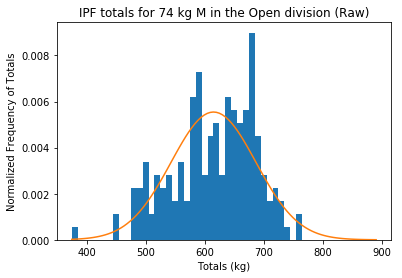

The average total for the 74 kg M in the Open division (Raw) is 615.0195530726257 kg
with a standard deviation of 71.92711167712537 kg


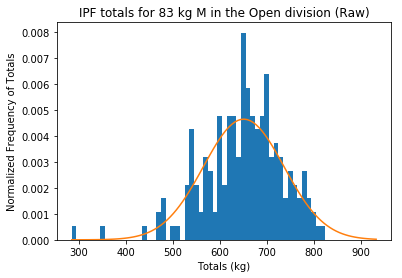

The average total for the 83 kg M in the Open division (Raw) is 651.0026315789473 kg
with a standard deviation of 85.82841661325197 kg


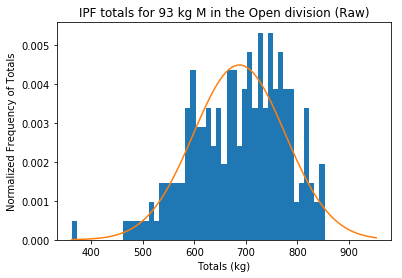

The average total for the 93 kg M in the Open division (Raw) is 687.2246376811594 kg
with a standard deviation of 88.9284928051645 kg


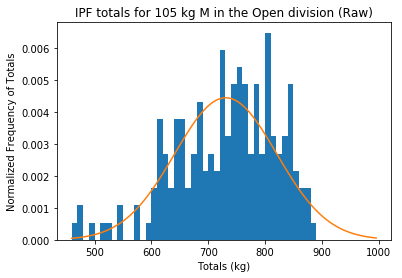

The average total for the 105 kg M in the Open division (Raw) is 730.8306451612904 kg
with a standard deviation of 89.66046812695693 kg


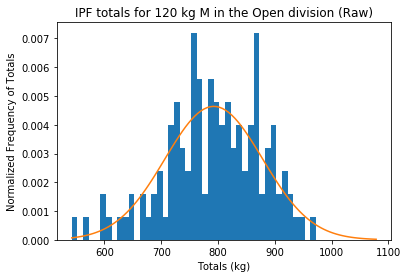

The average total for the 120 kg M in the Open division (Raw) is 792.5277777777778 kg
with a standard deviation of 86.00321389241006 kg


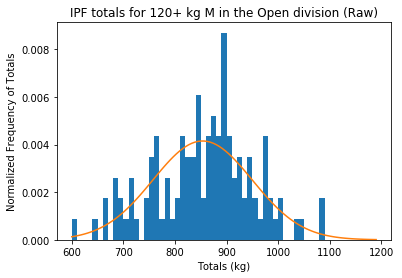

The average total for the 120+ kg M in the Open division (Raw) is 853.5304347826087 kg
with a standard deviation of 96.14179489638168 kg


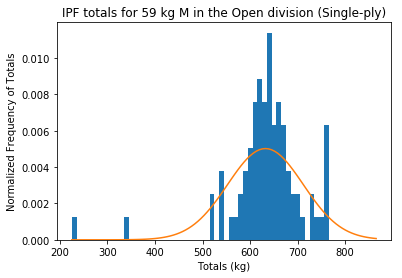

The average total for the 59 kg M in the Open division (Single-ply) is 632.1708860759494 kg
with a standard deviation of 79.48779406640988 kg


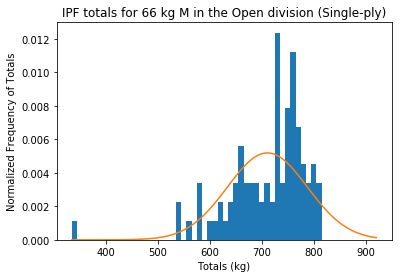

The average total for the 66 kg M in the Open division (Single-ply) is 710.7166666666667 kg
with a standard deviation of 76.9157926999824 kg


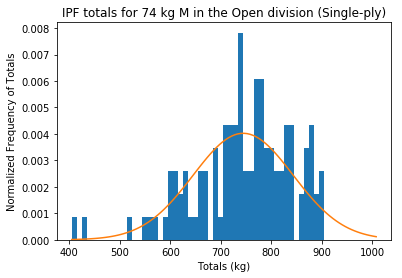

The average total for the 74 kg M in the Open division (Single-ply) is 744.5301724137931 kg
with a standard deviation of 99.1160345946274 kg


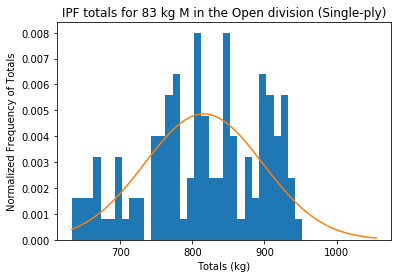

The average total for the 83 kg M in the Open division (Single-ply) is 815.5714285714286 kg
with a standard deviation of 82.01482430570518 kg


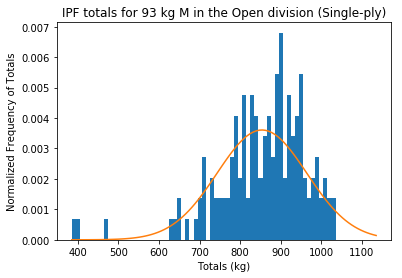

The average total for the 93 kg M in the Open division (Single-ply) is 853.547619047619 kg
with a standard deviation of 110.58398374230086 kg


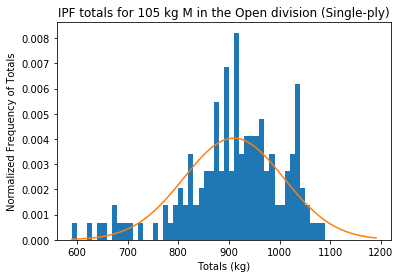

The average total for the 105 kg M in the Open division (Single-ply) is 909.6156462585034 kg
with a standard deviation of 98.89734023144635 kg


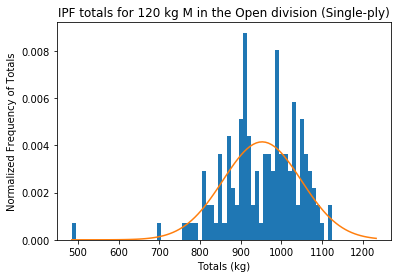

The average total for the 120 kg M in the Open division (Single-ply) is 952.3920863309353 kg
with a standard deviation of 96.2964689766652 kg


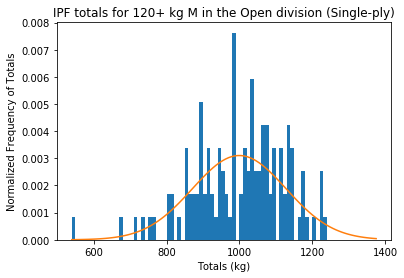

The average total for the 120+ kg M in the Open division (Single-ply) is 999.6512605042017 kg
with a standard deviation of 128.50431694383286 kg


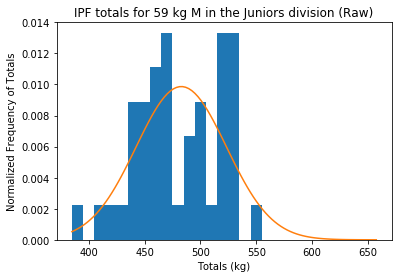

The average total for the 59 kg M in the Juniors division (Raw) is 482.9255319148936 kg
with a standard deviation of 40.43131537576954 kg


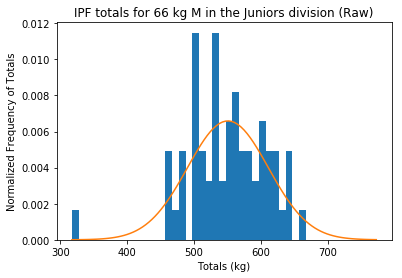

The average total for the 66 kg M in the Juniors division (Raw) is 550.9596774193549 kg
with a standard deviation of 60.567497564174346 kg


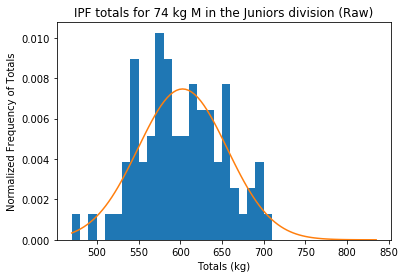

The average total for the 74 kg M in the Juniors division (Raw) is 602.85 kg
with a standard deviation of 53.39998829587886 kg


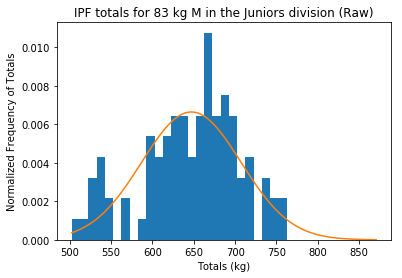

The average total for the 83 kg M in the Juniors division (Raw) is 647.0425531914893 kg
with a standard deviation of 60.09861840264504 kg


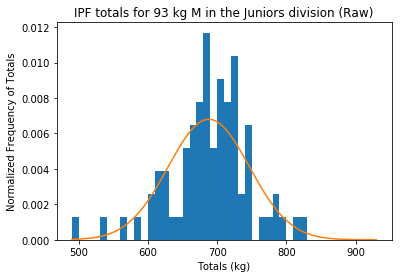

The average total for the 93 kg M in the Juniors division (Raw) is 687.8961038961039 kg
with a standard deviation of 58.64937293662513 kg


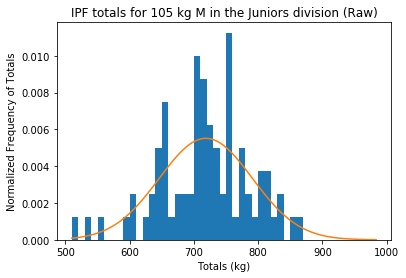

The average total for the 105 kg M in the Juniors division (Raw) is 718.5370370370371 kg
with a standard deviation of 72.35631900437463 kg


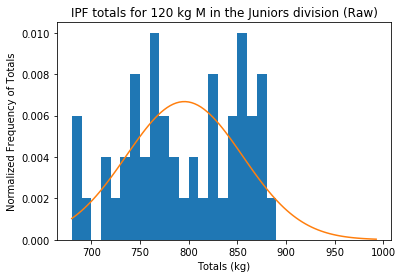

The average total for the 120 kg M in the Juniors division (Raw) is 795.6078431372549 kg
with a standard deviation of 59.780096507827736 kg


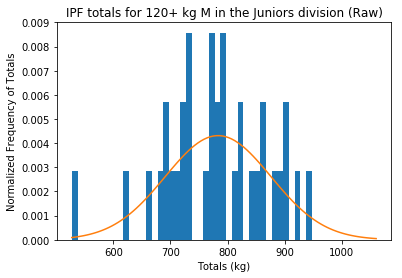

The average total for the 120+ kg M in the Juniors division (Raw) is 783.4722222222222 kg
with a standard deviation of 92.5156101276101 kg


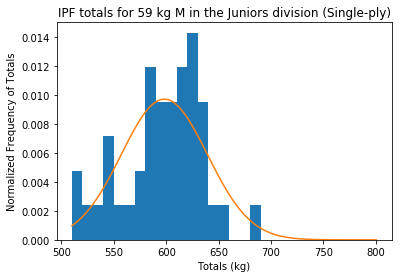

The average total for the 59 kg M in the Juniors division (Single-ply) is 598.2209302325581 kg
with a standard deviation of 41.11545037573812 kg


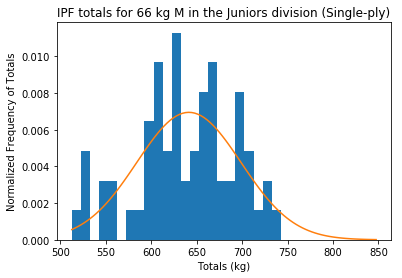

The average total for the 66 kg M in the Juniors division (Single-ply) is 641.3923076923077 kg
with a standard deviation of 57.40768457724723 kg


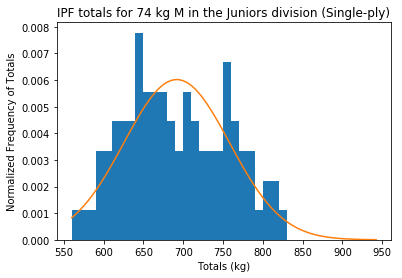

The average total for the 74 kg M in the Juniors division (Single-ply) is 691.8736263736264 kg
with a standard deviation of 66.2832580177138 kg


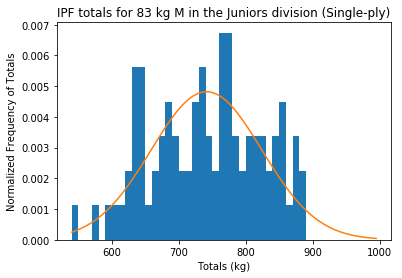

The average total for the 83 kg M in the Juniors division (Single-ply) is 741.3666666666667 kg
with a standard deviation of 82.76025616200086 kg


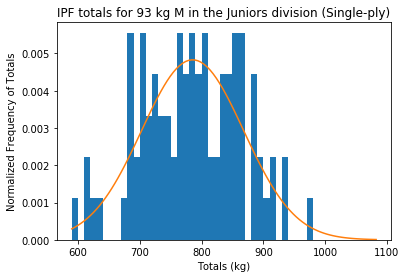

The average total for the 93 kg M in the Juniors division (Single-ply) is 785.5054945054945 kg
with a standard deviation of 82.62135578256309 kg


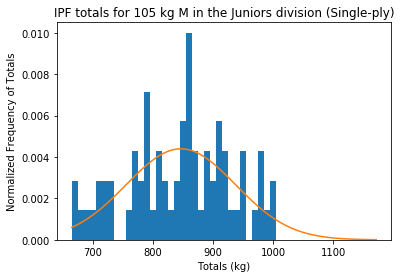

The average total for the 105 kg M in the Juniors division (Single-ply) is 846.3380281690141 kg
with a standard deviation of 90.8072860608976 kg


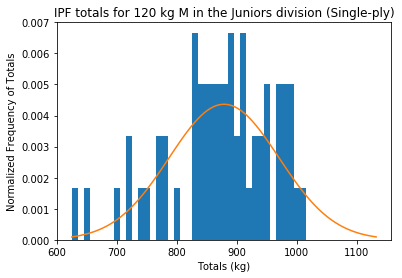

The average total for the 120 kg M in the Juniors division (Single-ply) is 878.8809523809524 kg
with a standard deviation of 91.41969823013964 kg


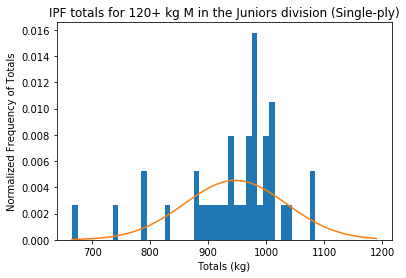

The average total for the 120+ kg M in the Juniors division (Single-ply) is 946.8589743589744 kg
with a standard deviation of 88.13363605387141 kg


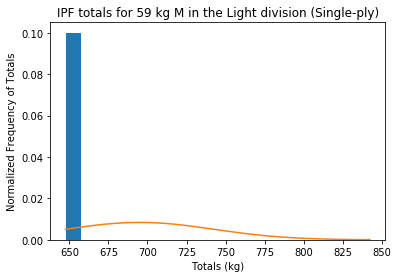

The average total for the 59 kg M in the Light division (Single-ply) is 695.0 kg
with a standard deviation of 47.5 kg


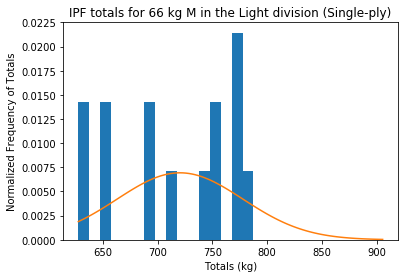

The average total for the 66 kg M in the Light division (Single-ply) is 720.4 kg
with a standard deviation of 57.55032580272678 kg


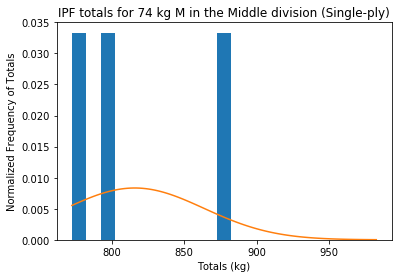

The average total for the 74 kg M in the Middle division (Single-ply) is 815.8333333333334 kg
with a standard deviation of 47.842333648024415 kg


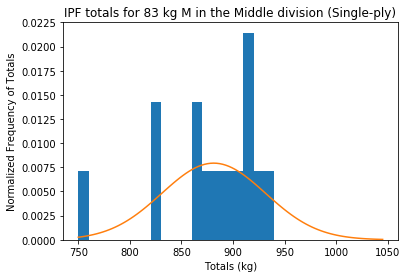

The average total for the 83 kg M in the Middle division (Single-ply) is 881.2333333333333 kg
with a standard deviation of 50.28878823577103 kg


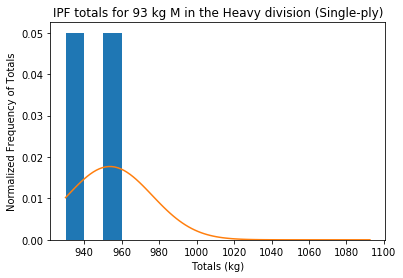

The average total for the 93 kg M in the Heavy division (Single-ply) is 953.7 kg
with a standard deviation of 22.544622418661174 kg


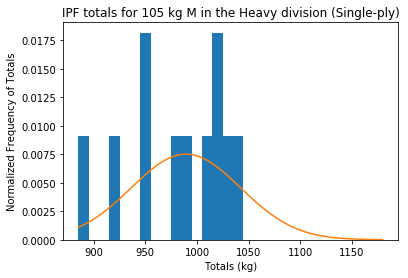

The average total for the 105 kg M in the Heavy division (Single-ply) is 989.3333333333334 kg
with a standard deviation of 53.051599619825055 kg


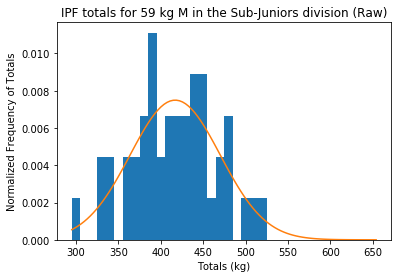

The average total for the 59 kg M in the Sub-Juniors division (Raw) is 416.9347826086956 kg
with a standard deviation of 53.237940938653175 kg


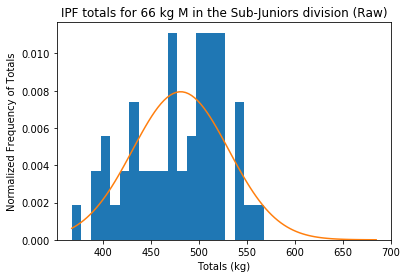

The average total for the 66 kg M in the Sub-Juniors division (Raw) is 481.0625 kg
with a standard deviation of 50.22103487334764 kg


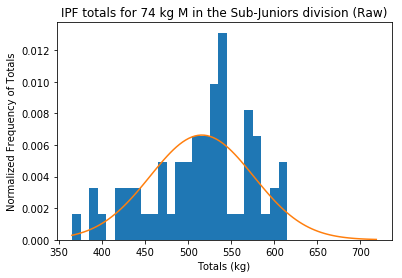

The average total for the 74 kg M in the Sub-Juniors division (Raw) is 515.8629032258065 kg
with a standard deviation of 60.14633830023336 kg


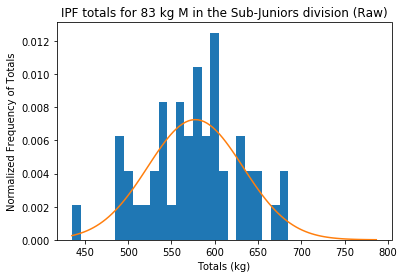

The average total for the 83 kg M in the Sub-Juniors division (Raw) is 577.5 kg
with a standard deviation of 54.9983302158403 kg


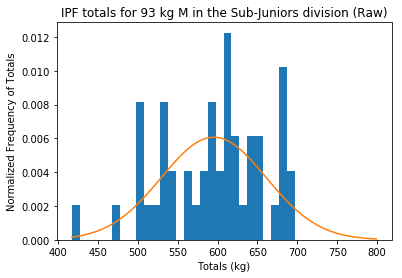

The average total for the 93 kg M in the Sub-Juniors division (Raw) is 595.29 kg
with a standard deviation of 65.74937946475237 kg


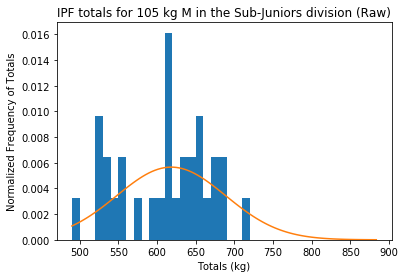

The average total for the 105 kg M in the Sub-Juniors division (Raw) is 618.3787878787879 kg
with a standard deviation of 70.47436997074317 kg


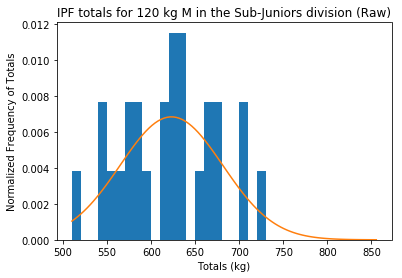

The average total for the 120 kg M in the Sub-Juniors division (Raw) is 623.0 kg
with a standard deviation of 58.23245245151984 kg


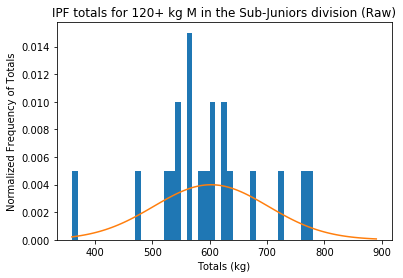

The average total for the 120+ kg M in the Sub-Juniors division (Raw) is 602.4047619047619 kg
with a standard deviation of 100.01935753685967 kg


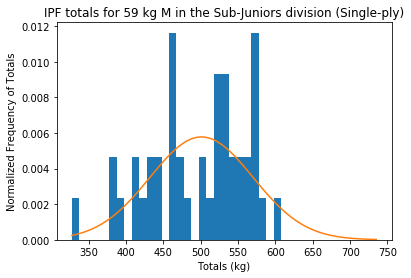

The average total for the 59 kg M in the Sub-Juniors division (Single-ply) is 500.9888888888889 kg
with a standard deviation of 69.067719497195 kg


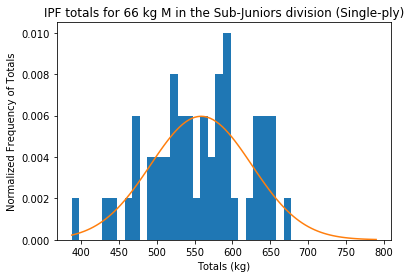

The average total for the 66 kg M in the Sub-Juniors division (Single-ply) is 558.5392156862745 kg
with a standard deviation of 66.89454996538304 kg


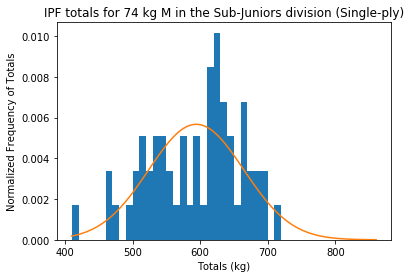

The average total for the 74 kg M in the Sub-Juniors division (Single-ply) is 594.2583333333333 kg
with a standard deviation of 70.31858998317743 kg


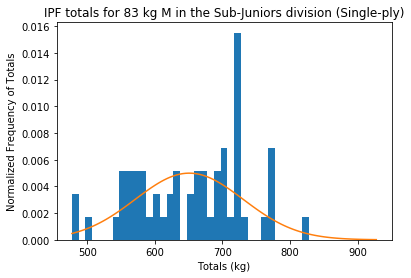

The average total for the 83 kg M in the Sub-Juniors division (Single-ply) is 650.9051724137931 kg
with a standard deviation of 79.87827252464838 kg


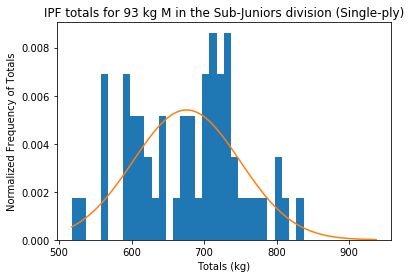

The average total for the 93 kg M in the Sub-Juniors division (Single-ply) is 675.9137931034483 kg
with a standard deviation of 73.78884937786276 kg


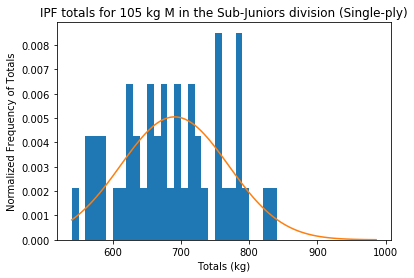

The average total for the 105 kg M in the Sub-Juniors division (Single-ply) is 690.5833333333334 kg
with a standard deviation of 78.96131260870028 kg


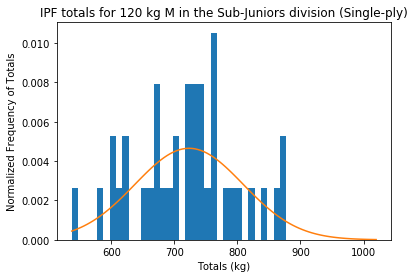

The average total for the 120 kg M in the Sub-Juniors division (Single-ply) is 723.4102564102565 kg
with a standard deviation of 85.76846230156676 kg


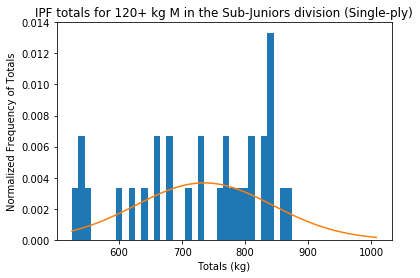

The average total for the 120+ kg M in the Sub-Juniors division (Single-ply) is 734.9354838709677 kg
with a standard deviation of 108.86383489178816 kg


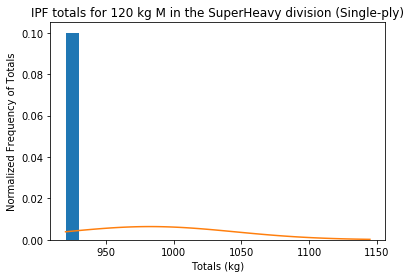

The average total for the 120 kg M in the SuperHeavy division (Single-ply) is 982.5 kg
with a standard deviation of 62.5 kg


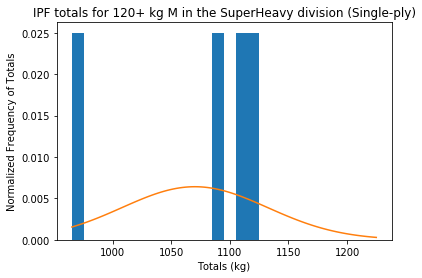

The average total for the 120+ kg M in the SuperHeavy division (Single-ply) is 1070.0 kg
with a standard deviation of 62.24949798994366 kg


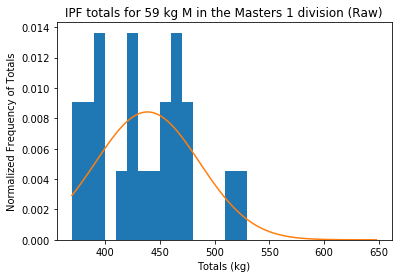

The average total for the 59 kg M in the Masters 1 division (Raw) is 438.9130434782609 kg
with a standard deviation of 47.375845105210445 kg


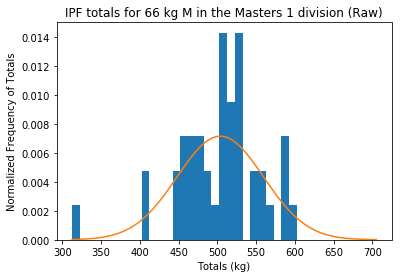

The average total for the 66 kg M in the Masters 1 division (Raw) is 503.8488372093023 kg
with a standard deviation of 55.81338662502836 kg


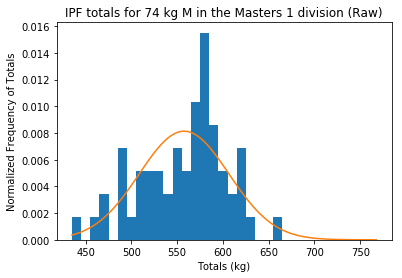

The average total for the 74 kg M in the Masters 1 division (Raw) is 557.542372881356 kg
with a standard deviation of 49.01031438792585 kg


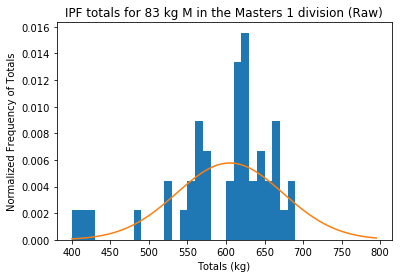

The average total for the 83 kg M in the Masters 1 division (Raw) is 604.8979591836735 kg
with a standard deviation of 69.14374110944952 kg


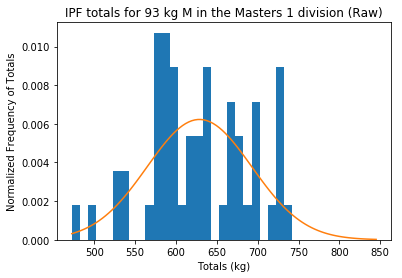

The average total for the 93 kg M in the Masters 1 division (Raw) is 628.7719298245614 kg
with a standard deviation of 64.06226892473096 kg


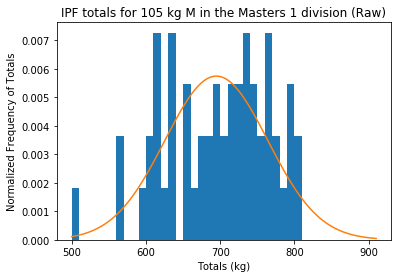

The average total for the 105 kg M in the Masters 1 division (Raw) is 694.7181818181818 kg
with a standard deviation of 69.37963833053638 kg


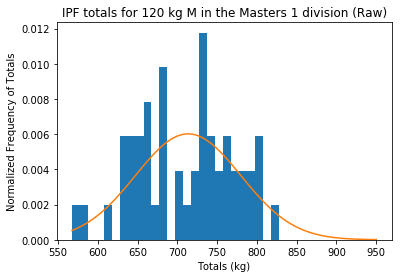

The average total for the 120 kg M in the Masters 1 division (Raw) is 713.5377358490566 kg
with a standard deviation of 66.28347136357371 kg


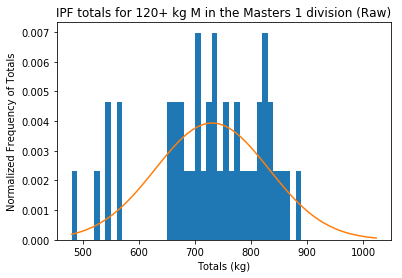

The average total for the 120+ kg M in the Masters 1 division (Raw) is 730.5113636363636 kg
with a standard deviation of 101.43635984271367 kg


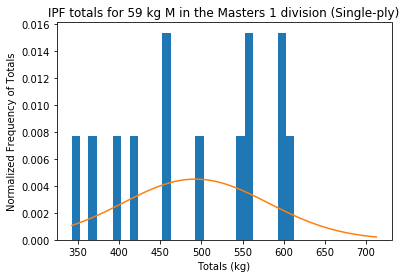

The average total for the 59 kg M in the Masters 1 division (Single-ply) is 492.7307692307692 kg
with a standard deviation of 88.50067696060412 kg


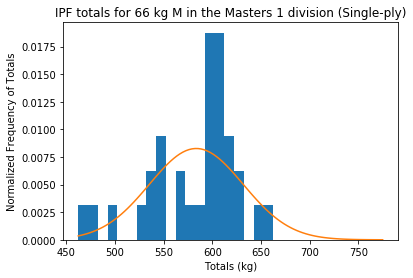

The average total for the 66 kg M in the Masters 1 division (Single-ply) is 583.6363636363636 kg
with a standard deviation of 48.257873078385735 kg


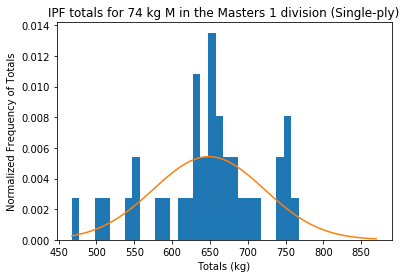

The average total for the 74 kg M in the Masters 1 division (Single-ply) is 648.5526315789474 kg
with a standard deviation of 73.524144751883 kg


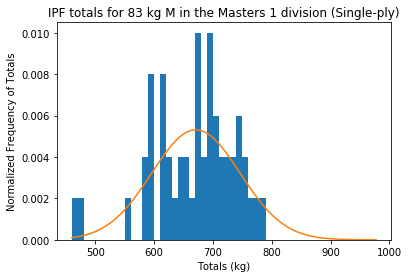

The average total for the 83 kg M in the Masters 1 division (Single-ply) is 670.9803921568628 kg
with a standard deviation of 75.10789368610905 kg


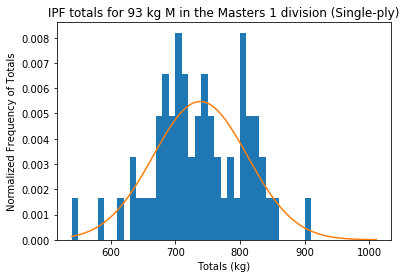

The average total for the 93 kg M in the Masters 1 division (Single-ply) is 738.6370967741935 kg
with a standard deviation of 72.87224621891819 kg


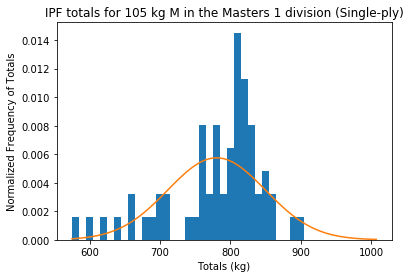

The average total for the 105 kg M in the Masters 1 division (Single-ply) is 780.5952380952381 kg
with a standard deviation of 69.44181400913875 kg


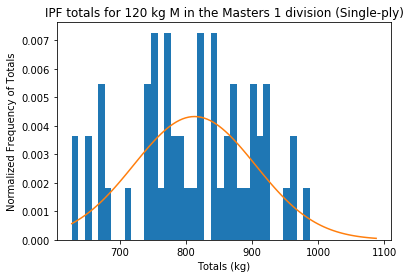

The average total for the 120 kg M in the Masters 1 division (Single-ply) is 813.2232142857143 kg
with a standard deviation of 92.16357351212848 kg


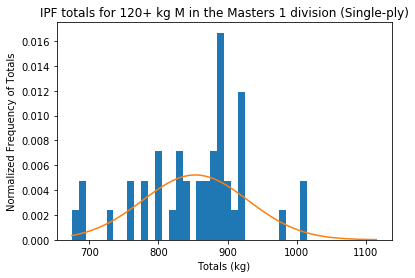

The average total for the 120+ kg M in the Masters 1 division (Single-ply) is 853.3928571428571 kg
with a standard deviation of 76.44602326340538 kg


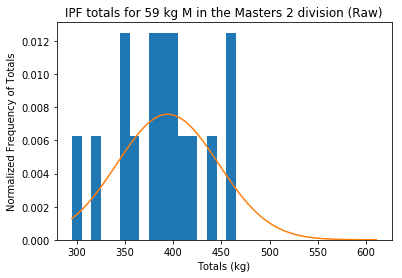

The average total for the 59 kg M in the Masters 2 division (Raw) is 394.29411764705884 kg
with a standard deviation of 52.64365746488628 kg


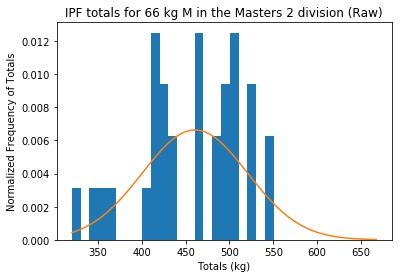

The average total for the 66 kg M in the Masters 2 division (Raw) is 460.77272727272725 kg
with a standard deviation of 60.17412749541708 kg


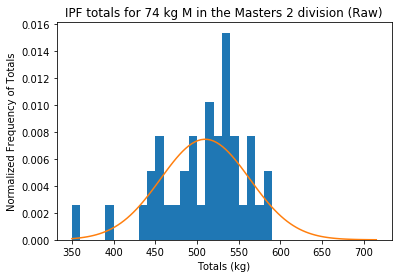

The average total for the 74 kg M in the Masters 2 division (Raw) is 509.75 kg
with a standard deviation of 53.407864589402934 kg


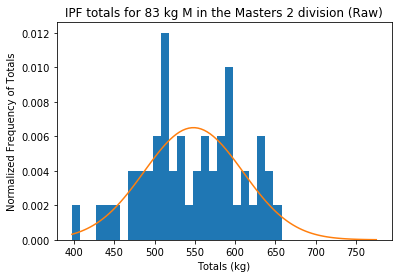

The average total for the 83 kg M in the Masters 2 division (Raw) is 548.2549019607843 kg
with a standard deviation of 61.39045500863192 kg


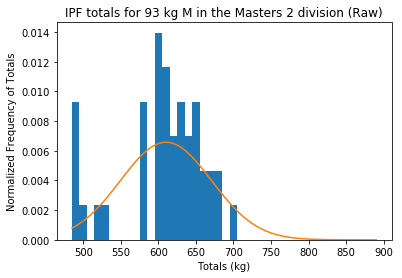

The average total for the 93 kg M in the Masters 2 division (Raw) is 610.125 kg
with a standard deviation of 60.67884207036255 kg


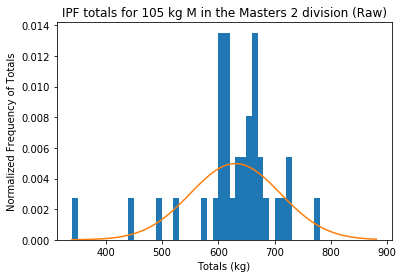

The average total for the 105 kg M in the Masters 2 division (Raw) is 630.2368421052631 kg
with a standard deviation of 80.18069534381188 kg


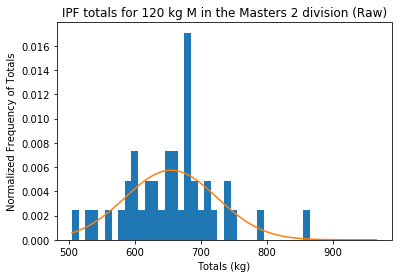

The average total for the 120 kg M in the Masters 2 division (Raw) is 654.8414634146342 kg
with a standard deviation of 69.5588397202273 kg


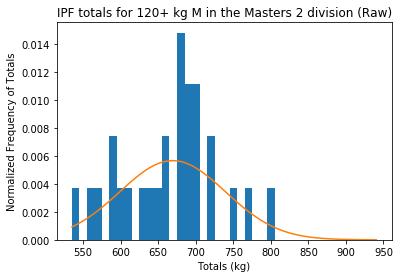

The average total for the 120+ kg M in the Masters 2 division (Raw) is 669.1607142857143 kg
with a standard deviation of 70.4516112524137 kg


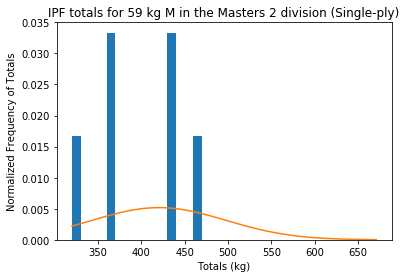

The average total for the 59 kg M in the Masters 2 division (Single-ply) is 420.5 kg
with a standard deviation of 77.03709681519862 kg


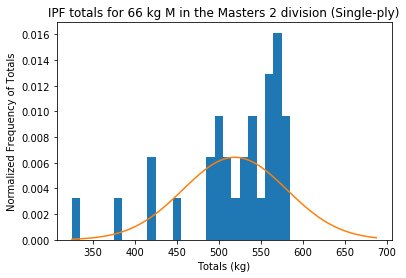

The average total for the 66 kg M in the Masters 2 division (Single-ply) is 519.0625 kg
with a standard deviation of 62.07275846738245 kg


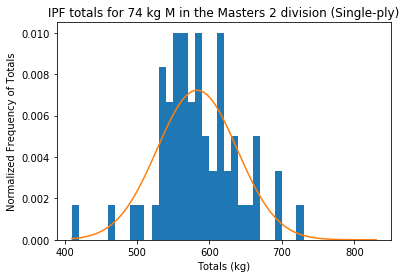

The average total for the 74 kg M in the Masters 2 division (Single-ply) is 582.9166666666666 kg
with a standard deviation of 55.23089161772503 kg


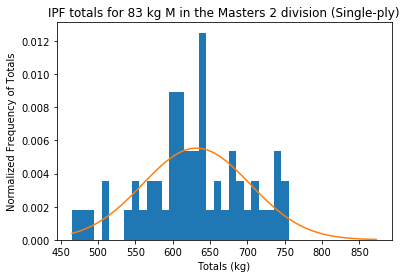

The average total for the 83 kg M in the Masters 2 division (Single-ply) is 631.6465517241379 kg
with a standard deviation of 72.11646522864879 kg


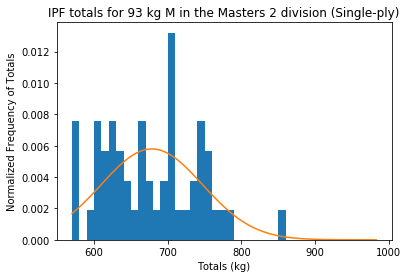

The average total for the 93 kg M in the Masters 2 division (Single-ply) is 678.4444444444445 kg
with a standard deviation of 68.83384898022265 kg


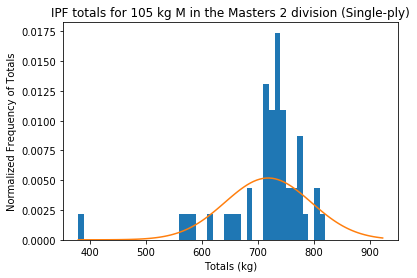

The average total for the 105 kg M in the Masters 2 division (Single-ply) is 718.2916666666666 kg
with a standard deviation of 76.86248768995763 kg


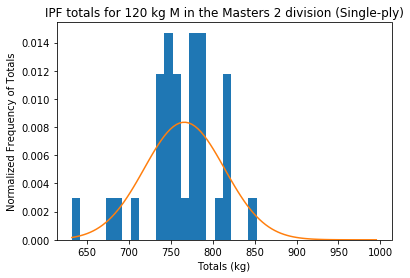

The average total for the 120 kg M in the Masters 2 division (Single-ply) is 766.4 kg
with a standard deviation of 47.78370911872431 kg


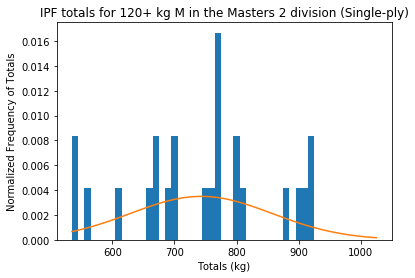

The average total for the 120+ kg M in the Masters 2 division (Single-ply) is 743.1666666666666 kg
with a standard deviation of 114.22206685030504 kg


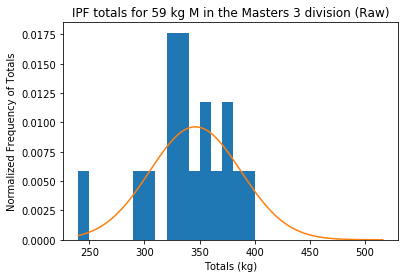

The average total for the 59 kg M in the Masters 3 division (Raw) is 346.13157894736844 kg
with a standard deviation of 41.421721388301606 kg


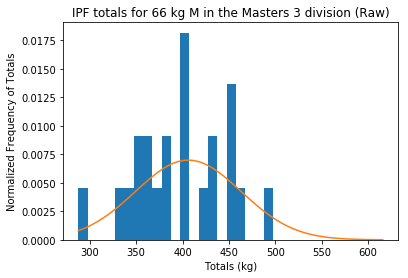

The average total for the 66 kg M in the Masters 3 division (Raw) is 406.2083333333333 kg
with a standard deviation of 57.037070669482624 kg


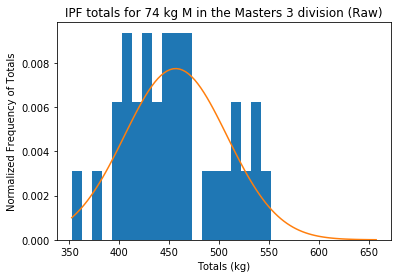

The average total for the 74 kg M in the Masters 3 division (Raw) is 456.6060606060606 kg
with a standard deviation of 51.46707649817555 kg


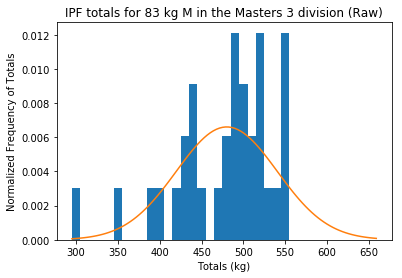

The average total for the 83 kg M in the Masters 3 division (Raw) is 480.1857142857143 kg
with a standard deviation of 60.384255955894155 kg


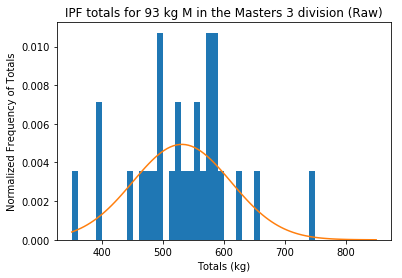

The average total for the 93 kg M in the Masters 3 division (Raw) is 530.8214285714286 kg
with a standard deviation of 80.81009642163205 kg


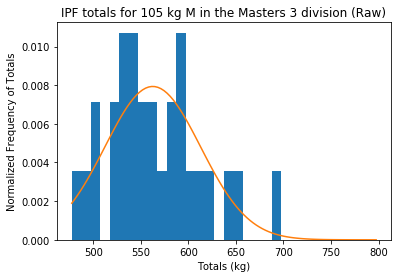

The average total for the 105 kg M in the Masters 3 division (Raw) is 562.6071428571429 kg
with a standard deviation of 50.28088197154794 kg


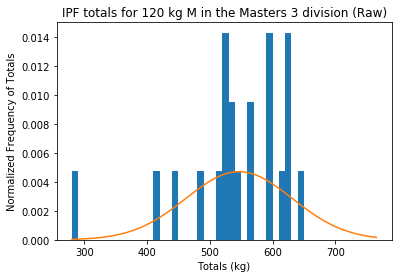

The average total for the 120 kg M in the Masters 3 division (Raw) is 546.5681818181819 kg
with a standard deviation of 84.85405859669046 kg


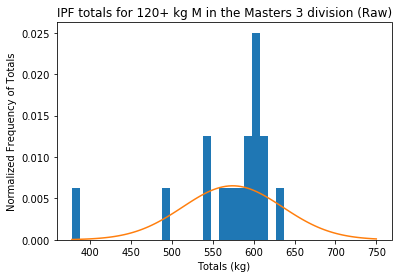

The average total for the 120+ kg M in the Masters 3 division (Raw) is 574.1764705882352 kg
with a standard deviation of 61.20191778436709 kg


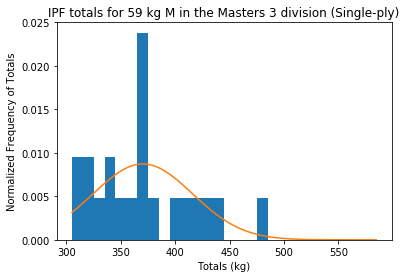

The average total for the 59 kg M in the Masters 3 division (Single-ply) is 370.23809523809524 kg
with a standard deviation of 45.74713601434235 kg


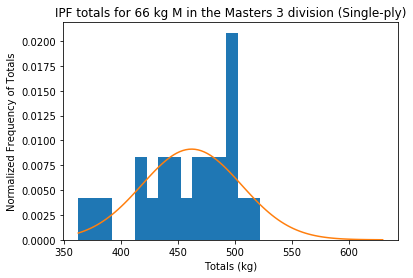

The average total for the 66 kg M in the Masters 3 division (Single-ply) is 462.13461538461536 kg
with a standard deviation of 43.7263249551439 kg


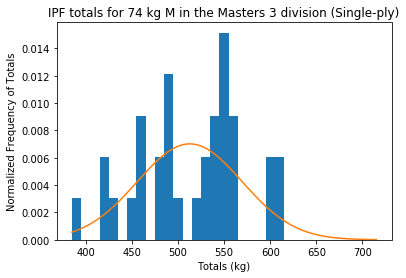

The average total for the 74 kg M in the Masters 3 division (Single-ply) is 512.7575757575758 kg
with a standard deviation of 56.832305315343156 kg


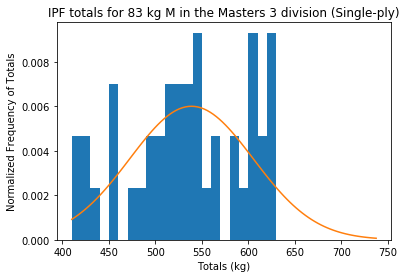

The average total for the 83 kg M in the Masters 3 division (Single-ply) is 538.804347826087 kg
with a standard deviation of 66.5119700129943 kg


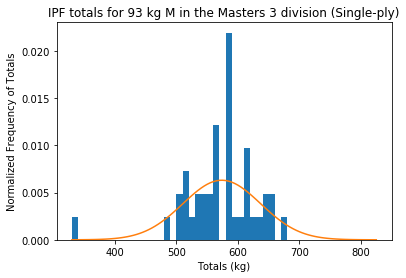

The average total for the 93 kg M in the Masters 3 division (Single-ply) is 573.702380952381 kg
with a standard deviation of 63.17342527517194 kg


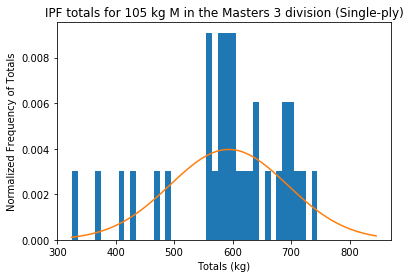

The average total for the 105 kg M in the Masters 3 division (Single-ply) is 593.4411764705883 kg
with a standard deviation of 100.58598638696867 kg


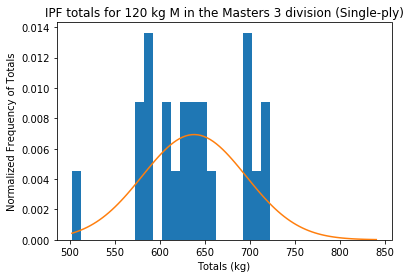

The average total for the 120 kg M in the Masters 3 division (Single-ply) is 638.1739130434783 kg
with a standard deviation of 57.56557861439273 kg


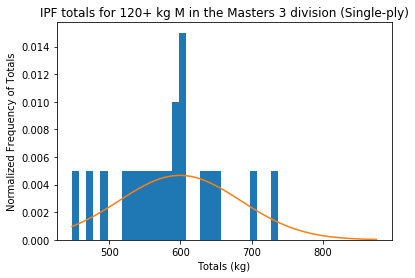

The average total for the 120+ kg M in the Masters 3 division (Single-ply) is 599.2272727272727 kg
with a standard deviation of 85.52069490011378 kg


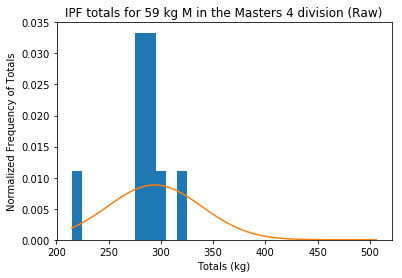

The average total for the 59 kg M in the Masters 4 division (Raw) is 294.1 kg
with a standard deviation of 45.20829569890907 kg


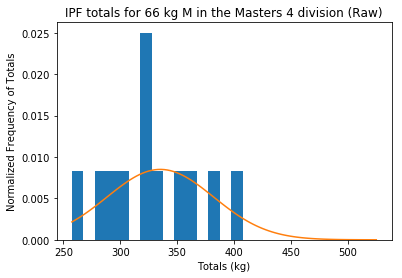

The average total for the 66 kg M in the Masters 4 division (Raw) is 335.1923076923077 kg
with a standard deviation of 46.93962507697376 kg


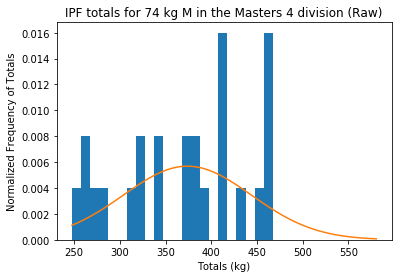

The average total for the 74 kg M in the Masters 4 division (Raw) is 373.8076923076923 kg
with a standard deviation of 70.1421738771548 kg


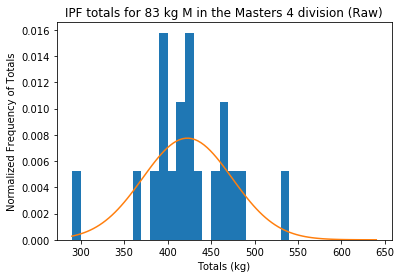

The average total for the 83 kg M in the Masters 4 division (Raw) is 422.7631578947368 kg
with a standard deviation of 51.47108754617096 kg


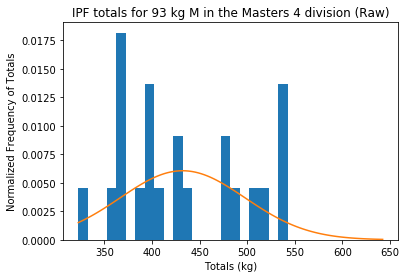

The average total for the 93 kg M in the Masters 4 division (Raw) is 432.15909090909093 kg
with a standard deviation of 65.79468518940989 kg


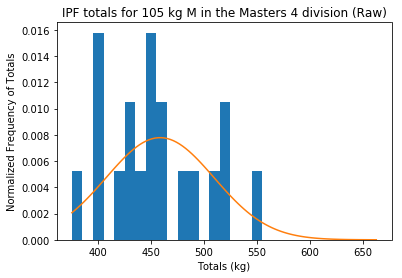

The average total for the 105 kg M in the Masters 4 division (Raw) is 458.425 kg
with a standard deviation of 51.21749579001301 kg


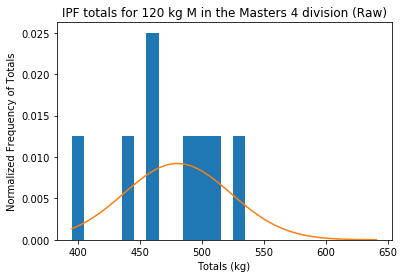

The average total for the 120 kg M in the Masters 4 division (Raw) is 480.05555555555554 kg
with a standard deviation of 43.330413007009575 kg


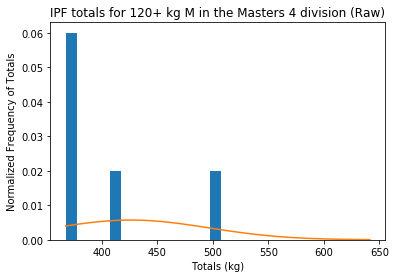

The average total for the 120+ kg M in the Masters 4 division (Raw) is 426.5 kg
with a standard deviation of 69.79434074479104 kg


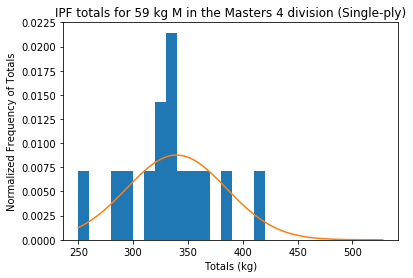

The average total for the 59 kg M in the Masters 4 division (Single-ply) is 339.56666666666666 kg
with a standard deviation of 45.48218210342253 kg


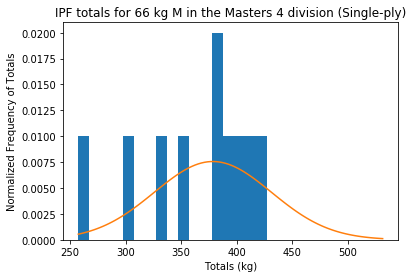

The average total for the 66 kg M in the Masters 4 division (Single-ply) is 378.65384615384613 kg
with a standard deviation of 52.76376401375671 kg


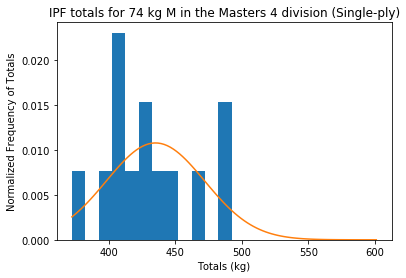

The average total for the 74 kg M in the Masters 4 division (Single-ply) is 435.25 kg
with a standard deviation of 36.95931643616493 kg


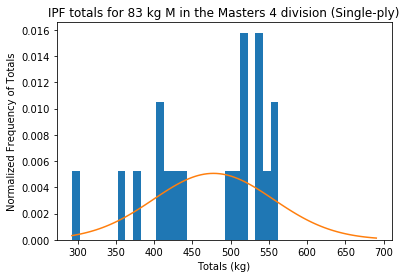

The average total for the 83 kg M in the Masters 4 division (Single-ply) is 477.55 kg
with a standard deviation of 78.77117175718539 kg


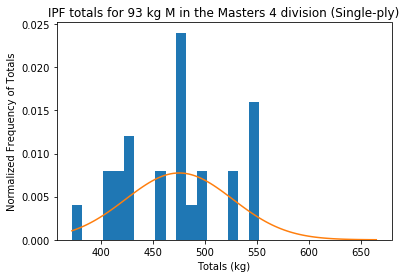

The average total for the 93 kg M in the Masters 4 division (Single-ply) is 475.5769230769231 kg
with a standard deviation of 51.50759695791193 kg


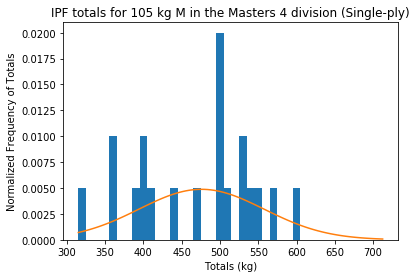

The average total for the 105 kg M in the Masters 4 division (Single-ply) is 475.9047619047619 kg
with a standard deviation of 81.80706382464766 kg


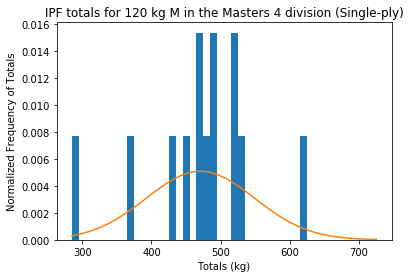

The average total for the 120 kg M in the Masters 4 division (Single-ply) is 470.7692307692308 kg
with a standard deviation of 78.39363577598321 kg


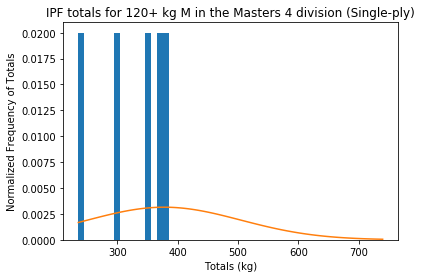

The average total for the 120+ kg M in the Masters 4 division (Single-ply) is 377.5 kg
with a standard deviation of 126.71325897474186 kg


In [166]:
for sex in sexes:
    if sex == 'M':
        weight_classes= weight_classes_men
    else:
        weight_classes= weight_classes_women
    for division in divisions:
        for equipment in equipment_choices:
            for weight_class in weight_classes:
                totals_hist(sex,equipment,division,weight_class)